**Prepared by: Tim Hayes**

**Cohort: PGP-DSBA-UTA-AUG''22-A2**'

# EasyVisa Project


**Marks: 60**


## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

import os
import math

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


In [2]:
data = pd.read_csv("EasyVisa.csv")
df = data.copy()

In [3]:
# returns the first 5 rows
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
# returns the last 5 rows
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Observations
- case_id appears to be a unique identifier.
- Asia seems to occur frequently as a continent.
- has_job_experience, requires_job_training and full_time_position seem to have binary values of Y and N.
- For yr_of_estab there seems to be quite a spread between values.
- no_of_employees, yr_of_estab, prevailing_wage appear to be numerical columns.
- continent, education_of_employee, region_of_employment, unit_of_wage and case_status appear to be categorical variables.

In [5]:
# Use shape() to get the dimensions of the dataframe
df_shape = df.shape
print("DataFrame has {} rows and {} columns".format(df_shape[0], df_shape[1]))

DataFrame has 25480 rows and 12 columns


#### Observations
- The DataFrame has 25480 rows and 12 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Observations
- There are 9 object columns, 2 int64 and 1 float column.

In [7]:
# Check for missing values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Observations
- There are no null values found in the dataset.

In [8]:
# See if we have an duplicated data
print('Rows of duplicated data in the dataset {}'.format(df.duplicated().sum()))

Rows of duplicated data in the dataset 0


#### Observations
- There are no duplicate rows found in the dataset.

In [9]:
# Use describe() to get a statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Observations
- The min value for no_of_employees is -26 and the max is 602069. 
- The mean no_of_employees is 22877.92 which is greater than 2109 indicating the data is right skewed.


- The min value for yr_of_estab is 1800 and the max is 2016. 
- The mean yr_of_estab is 1979.40 which is less than 1997 indicating the data is left skewed.


- The min value for prevailing_wage is 2.1367 and the max is 319210.27. 
- The mean prevailing_wage is 74455.81 which is greater than 70308.21 indicating the data is right skewed.

In [10]:
# Use describe() to get a statistical summary
df.describe(include=object).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


#### Observations
- case_id appears to be a unique identifier.
- Asia is the most popular continent.
- Bachelor's is the most postion level of education.
- Y is the most popular has_job_experience value.
- N is the most popular requires_job_training value.
- Northeast is the most popular region of employment.
- The most popular unit of wage is Year.
- Y is the most popular full_time_position value.
- The most popular case status is Certified.

## Utility Functions

In [11]:
def percent_diff(old, new):
    '''Calculate percentage difference
    :x: Old percentage
    :y: New percentage
    ''' 
    round_new = round(new,3)
    round_old = round(old,3)
    return ((round_new-round_old)/round_old)*100

## Utility Graphical Functions

In [12]:
def output_pretty_boxplot(df, x, y=None, hue=None, figsize=None, title=None, order=None, rotate_x=False):
    '''Output a customized nice looking standardized boxplot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :y: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default to nNone
        :figsize: The figurare size tuple to use in the plot default is None
        :title: the title desired in the plot default is Boxplot: {x} vs {y}'
        :order: boxplot order default is none'
        :rotate_x: rotate x axis text default is false'
    ''' 
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(10,3);      
        
    plt.figure(figsize=figsize);

    if (rotate_x):
        plt.xticks(rotation=45);
        
    if (title is None):
        title = 'Boxplot: {}'.format(x);
        
        if (y is not None):
            title += ' vs {}'.format(y);
            
        if (hue is not None):
            title += ' with a hue of {}'.format(hue);

    # Output boxplot with variables
    sns.boxplot(data=df,x=x, y=y, showmeans=True, hue=hue, order=order);

    plt.title(title);  
    plt.show();
    
def output_pretty_countplot(df, x, order=None, hue=None, figsize=None, title=None):
    '''Output a customized nice looking standardized countplot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :order: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default is None
        :figsize: The figure size tuple to use in the plot default is None
        :title: The title to use default is Countplot: for {}
    ''' 
    
    if (title is None):
        title = 'Countplot: for {}'.format(x)
    
        if (hue is not None):
            title += ' with hue of {}'.format(hue)
        
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(15,3.5);
        
    plt.figure(figsize=figsize);
        
    plt.xticks(rotation=45);
    plt.rcParams["figure.figsize"] = [7.0, 3.5]
    plt.rcParams["figure.autolayout"] = True
       
    # Ouput count plot
    ax = sns.countplot(data=df,x=x,order=order,hue=hue);           
        
    # output the amounts on top of the bars
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + (p.get_height()*0.01)
        value = '{:.1f}'.format(p.get_height())
        
        if (pd.isna(x) or pd.isna(y) or pd.isna(value)):
            continue
  
        ax.text(x, y, value, ha="center")

    plt.title(title);
    plt.show();
    
def output_pretty_histplot(df, x, title=None):
    '''Output a customized nice looking standardized histplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :title:
    '''
       
    plt.figure(figsize=(10,3));
    sns.histplot(data=df,x=x,kde=True);
    
    if (title is None):
        title = 'Histplot: for {}'.format(x);
        
    plt.title(title);
    plt.show();
    
def output_pretty_barplot(title, df, x, y, order=None, hue=None):
    '''Output a customized nice looking standardized barplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :y: The y axis variable to use in the plot
        :order: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default is None
    ''' 

    g = sns.catplot(data=df,x=x,y=y,kind='bar',order=order, hue=hue);
     
    g.fig.set_size_inches(15, 4)
    g.fig.subplots_adjust(top=0.81, right=0.86)

    # extract the matplotlib axes_subplot objects from the FacetGrid
    ax = g.facet_axis(0, 0)

    # iterate through the axes containers and add amount to bar
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    
    plt.title(title);
    plt.xticks(rotation=90);

def output_pretty_crosstab_plot(title, x, y, figsize=None,sort_key=None, ascending=True):
    '''Output a customized nice looking standardized crosstab barplot
        :title: the title desired in the plot
        :x: The x data to use in the plot
        :y: The y data to use in the plot in the plot
        :figsize: Figure size to use default is 12,5
    ''' 
    
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(15,3);
               
    crosstab_percentages = pd.crosstab(x, y, normalize='index')
           
    if (sort_key is not None):
        crosstab_percentages = crosstab_percentages.sort_values(by=sort_key, ascending=ascending)
        
    crosstab_percentages.plot(kind='bar',stacked=True, figsize=figsize)
        
    plt.legend()
           
    plt.title(title);
    plt.xticks(rotation=45);
    plt.show()
    return crosstab_percentages

def output_pretty_numeric_plots(df, feature, title_suffix=''):
    '''Output a customized boxplot and histplot
    :df: DataFrame to use
    :feature: the feature to plot
    :title_suffix: title suffix to append, default is ''
    ''' 
    print(df[feature].describe())
    output_pretty_boxplot(df, feature);
    output_pretty_histplot(df, feature, title='Histplot: for {}{}'.format(feature, title_suffix));
    
def output_pretty_residuals(df_pred):
    '''Output a pretty residual plot
    :df_pred: df with fitted values and residuals
    ''' 
    # let us plot the fitted values vs residuals
    sns.set_style("whitegrid")
    sns.residplot(
        data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
    )
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.title("Fitted vs Residual plot")
    plt.show()

def output_residuals(model, y_train):
    '''Calculate df with actual, fitted and residual values output a pretty residual plot
    :model: model where to extract fitted values and residuals
    :y_train: training values for target variable
    ''' 
    df_pred = pd.DataFrame()

    df_pred["Actual Values"] = y_train.values.flatten()  # actual values
    df_pred["Fitted Values"] = model.fittedvalues.values  # predicted values
    df_pred["Residuals"] = model.resid.values  # residuals

    output_pretty_residuals(df_pred)
    return df_pred

def output_pretty_scatterplot(df, x, y, hue=None, figsize=None):
    '''Output a customized nice looking standardized scatterplot
        :df: DataFrame to use
        :x: The x data to use in the plot
        :y: The y data to use in the plot in the plot
        :hue: Hue to employ default i None
        :figsize: Figure size to use default is 15,5
    '''
    
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(15,5)
                 
    plt.figure(figsize=(15, 5));
    ax = sns.scatterplot(data=df, x=x, y=y, hue=hue);

    title = 'Scatterplot: {} vs {}'.format(x,y)
    if (hue is not None):
            title += ' with hue of {}'.format(hue)
    
    plt.title(title);
        
    plt.show();

##  Utility Classification Functions 

In [13]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

def plot_feature_importance(model, feature_names):
    """
    Function to plot feature importance

    model: classifier
    feature_names: names of the features
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)

    fig, ax = plt.subplots(figsize=(10, 10))

    bars = ax.barh(range(len(indices)), importances[indices], color="violet", align="center")
    ax.bar_label(bars)
    ax.set_xlabel("Relative Importance")
    ax.set_title("Feature Importances")
    ax.set_yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.show()
    
def plot_tree(model, feature_names):
    """
    Function to plot a decision tree

    model: classifier
    feature_names: names of the features
    """
    plt.figure(figsize=(20, 10))

    out = tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show();
    
    
def calculate_performance(model, x, y, model_dict, key, train=True):
    """
    Function to calculate classification model performance

    model: classifier
    x: Independent variable
    y: Dependent variable
    model_dict: Dictionary to store the results
    key: Key in the dictionary to use for result storage
    train: Flag indicating if this is training data default is True
    """
    #Calculating different metrics
    result = model_performance_classification_sklearn(model, x, y)
    model_dict[key] = result.T

    if (train):
        print("Training Performance:")
    else:
        print("Testing Performance:")
        
    #Creating confusion matrix
    confusion_matrix_sklearn(model, x,y)
    
    return result


def fit_hypertuned_model(model, parameters, x, y, cv=True):
    """
    Function to fit a classification model based on GridSearch results

    model: classifier
    parameters: Parms to use in the grid search
    x: Independent variable
    y: Dependent variable
    cv: Flag indicating if a specific cross validation should be used in grid search
    """
    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.f1_score)

    # Run the grid search
    if (cv):
        grid_obj = GridSearchCV(model, parameters, cv=5, scoring=scorer,n_jobs=-1)
    else:
        grid_obj = GridSearchCV(model, parameters, scoring=scorer,n_jobs=-1)
        
    grid_obj = grid_obj.fit(x, y)

    # Set the clf to the best combination of parameters
    model = grid_obj.best_estimator_

    # Fit the best algorithm to the data. 
    model.fit(x, y)
    
    return model

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [14]:
#case_id does not add value to dataset so lets drop it
df.drop('case_id', axis=1, inplace=True)

In [15]:
# Lets encode booking_status as a boolean
df["case_status"] = df["case_status"].apply(
    lambda x: 1 if x == "Certified" else 0
)

In [16]:
df["case_status"].value_counts(normalize=True)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

#### Observations
- The dependent variable is imbalanced with 66.7% of the visas certified and 33.2 denied.

In [17]:
# Let's calculate years_open from yr_of_estab to establish potential impact years open has on case_status

# Get the max year of the dataset and then subtract to calculate years open
max_year = df['yr_of_estab'].max()
df['years_open'] = max_year - df['yr_of_estab']

# Now drop 'yr_of_estab' since it does not add further value to the analysis
df.drop('yr_of_estab', axis=1, inplace=True)

In [18]:
df['years_open'].describe()

count    25480.000000
mean        36.590071
std         42.366929
min          0.000000
25%         11.000000
50%         19.000000
75%         40.000000
max        216.000000
Name: years_open, dtype: float64

In [19]:
# Investigate the negative no_of_employees values
df[df['no_of_employees'] < 0]['no_of_employees']

245     -25
378     -11
832     -17
2918    -26
6439    -14
6634    -26
7224    -25
7281    -14
7318    -26
7761    -11
9872    -26
11493   -14
13471   -17
14022   -11
14146   -26
14726   -11
15600   -14
15859   -11
16157   -11
16883   -26
17006   -11
17655   -17
17844   -14
17983   -26
20815   -17
20984   -14
21255   -25
21760   -25
21944   -25
22084   -14
22388   -14
23186   -11
23476   -11
Name: no_of_employees, dtype: int64

In [20]:
# Take the absolute value of all employees to deal with the negative values above
df['no_of_employees'] = abs(df['no_of_employees'])
df['no_of_employees'].describe()

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

In [21]:
# Output counts for categorical columns
for column in df.select_dtypes("object").columns:
    print('{}\n'.format(df[column].value_counts()))

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

Y    14802
N    10678
Name: has_job_experience, dtype: int64

N    22525
Y     2955
Name: requires_job_training, dtype: int64

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

Y    22773
N     2707
Name: full_time_position, dtype: int64



#### Observations
- All the values for the categorical variables look reasonable.

In [22]:
# Let's binary encode has job experience, requires_job_training and full_time_position
features_to_treat = ['has_job_experience', 'requires_job_training', 'full_time_position']
for feature in features_to_treat:
    df[feature] = df[feature].apply(lambda x: 1 if x == "Y" else 0)

In [23]:
df.groupby('unit_of_wage')['full_time_position'].value_counts(normalize=True)

unit_of_wage  full_time_position
Hour          1                     0.991191
              0                     0.008809
Month         1                     0.943820
              0                     0.056180
Week          1                     0.963235
              0                     0.036765
Year          1                     0.883590
              0                     0.116410
Name: full_time_position, dtype: float64

#### Observations
- Having multiple units of wage increases difficulty of comparisons.
- We would like to convert to Year or Hourly however note above all the units of wage have a non-zero percentage of part time workers that fact in and of itself makes a unified conversion problematic and error prone. For that reason we will not convert to a single unit of wage.

### Outlier Detection 

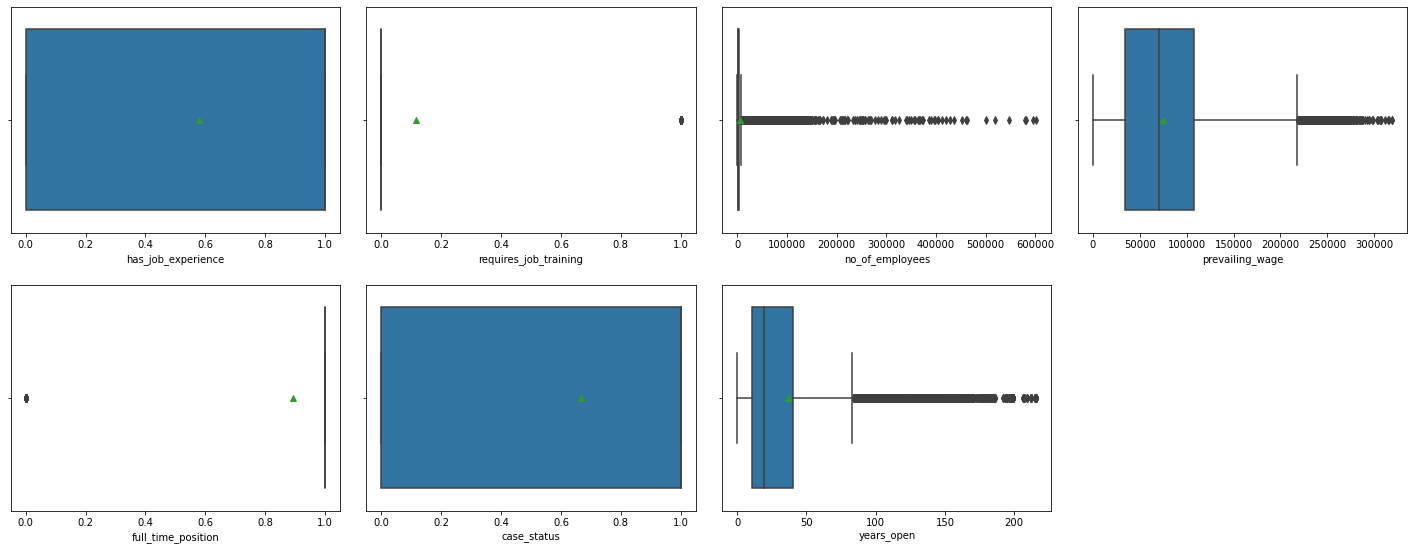

In [24]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,8))

nrows = math.ceil(len(num_cols)/4)
for i, variable in enumerate(num_cols):
    plt.subplot(nrows, 4, i + 1)
    sns.boxplot(data=df, x=variable, showmeans=True)
    plt.tight_layout(pad=2)

plt.show()

#### Observations
- All the numeric fields have outliers for the exception of has_job_experience and case_status.
- Most of the outliers seem reasonable and do not appear to be anomalous for the exception of years_open and no_of_employees which have some distant outliers that need treatment.

In [25]:
# Clip years_open to a 200 year max
df['years_open'].clip(upper=200, inplace=True)

In [26]:
# Clip no_of_employees to 475000
df['no_of_employees'].clip(upper=475000, inplace=True)

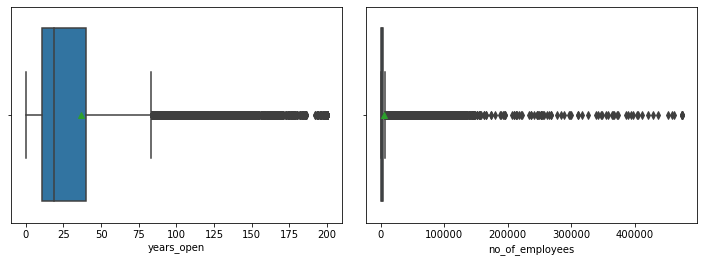

In [27]:
# outlier detection using boxplot
num_cols = ['years_open', 'no_of_employees']
plt.figure(figsize=(20,4))

nrows = math.ceil(len(num_cols)/4)
for i, variable in enumerate(num_cols):
    plt.subplot(nrows, 4, i + 1)
    sns.boxplot(data=df, x=variable, showmeans=True)
    plt.tight_layout(pad=2)

plt.show()

**Leading Questions**:

### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

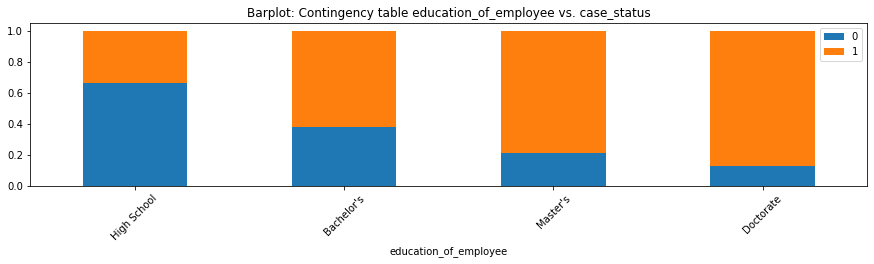

case_status,0,1
education_of_employee,,
High School,0.659649,0.340351
Bachelor's,0.377858,0.622142
Master's,0.213722,0.786278
Doctorate,0.127737,0.872263


In [28]:
# crosstab plot of education_of_employee vs case_status
output_pretty_crosstab_plot('Barplot: Contingency table education_of_employee vs. case_status', \
                            df['education_of_employee'], df['case_status'], sort_key=1)

#### Observations
- Those with a Doctorate had the highest Visa certification rate of 87.2% while those with only High School had a 34% certification rate.
- As the level of education increases so does the probability of certification.

### 2. How does the visa status vary across different continents? 

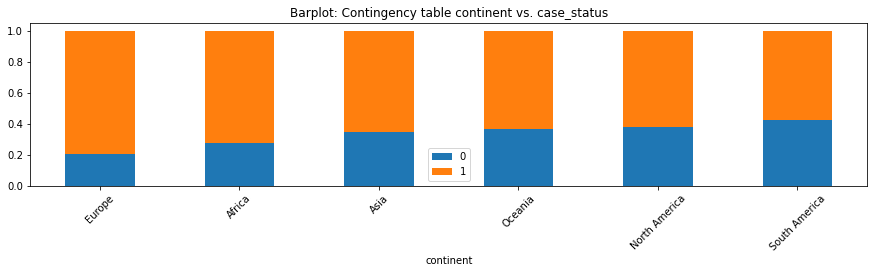

case_status,0,1
continent,,
Europe,0.207663,0.792337
Africa,0.279492,0.720508
Asia,0.346895,0.653105
Oceania,0.364583,0.635417
North America,0.381227,0.618773
South America,0.421362,0.578638


In [29]:
# crosstab plot of continent vs case_status
output_pretty_crosstab_plot('Barplot: Contingency table continent vs. case_status', \
                            df['continent'], df['case_status'], sort_key=1, ascending=False)

#### Observations
- European applicants had the highest certification rate 79.2% while those from South America had the lowest 57.8%.

### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

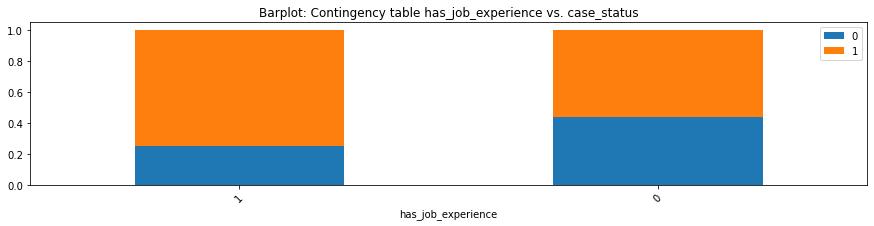

case_status,0,1
has_job_experience,,
1,0.255236,0.744764
0,0.438659,0.561341


In [30]:
# crosstab plot of has_job_experience vs case_status
output_pretty_crosstab_plot('Barplot: Contingency table has_job_experience vs. case_status', \
                            df['has_job_experience'], df['case_status'], sort_key=1, ascending=False)

#### Observations
- For applicants with job experience 74.4% of them were certified for their visa while only 56% of those who did not have job experience were certified.
- The visa certification rate for applicants with job experience is 32.69% higher than those without thus has_job_experience influences visa certification.

###  4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

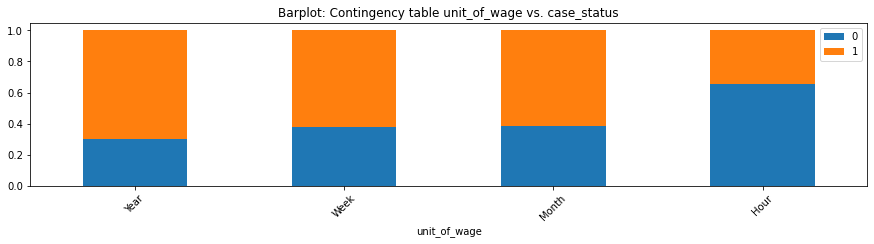

case_status,0,1
unit_of_wage,,
Year,0.301150,0.698850
Week,0.378676,0.621324
Month,0.382022,0.617978
Hour,0.653686,0.346314


In [31]:
# crosstab plot of unit_of_wage vs case_status
output_pretty_crosstab_plot('Barplot: Contingency table unit_of_wage vs. case_status', \
                            df['unit_of_wage'], df['case_status'], sort_key=1, ascending=False)

#### Observations
- The most likely unit_of_wage for applicants to be certified is Year with 69.8% were certified while the least likely is Hour with 34.6% certification.

### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

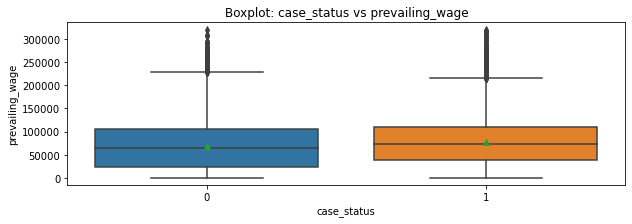

prevailing_wage                                                 \
                      count          mean           std     min        25%   
case_status                                                                  
0                    8462.0  68748.681580  53890.166031  2.9561  23497.295   
1                   17018.0  77293.619243  52042.715576  2.1367  38375.330   

                                               
                  50%          75%        max  
case_status                                    
0            65431.46  105097.6400  319210.27  
1            72486.27  108879.1075  318446.05

In [32]:
output_pretty_boxplot(df, 'case_status', y='prevailing_wage')
describe_df = df.groupby(['case_status'])[['prevailing_wage']].describe()
describe_df

#### Observations
- The mean prevailing_wage for applicants that were certified is 77293.61 which is is 12.43% higher than the mean prevailing wage for those that were not certified.

### Univariate Analysis

#### Let's investigate continent

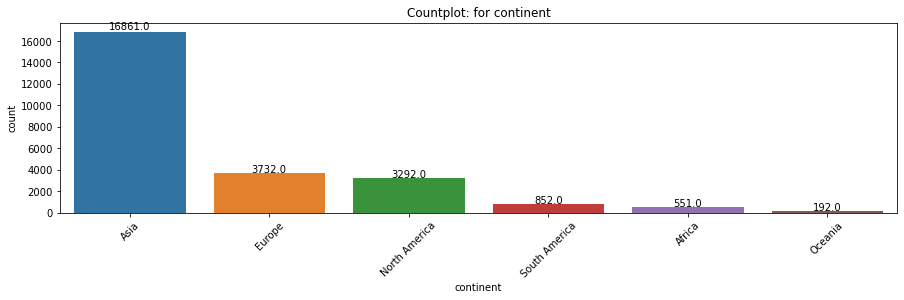

Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: continent, dtype: float64

In [33]:
# Countplot for continent
output_pretty_countplot(df, 'continent', \
                        order=df['continent'].value_counts().index)
df['continent'].value_counts(normalize=True)

#### Observations
- Asia has the most applicants with 66.17% (16861) of the total.
- Oceania has the fewest applicants with .7% (192) of the total.

#### Let's investigate education_of_employee

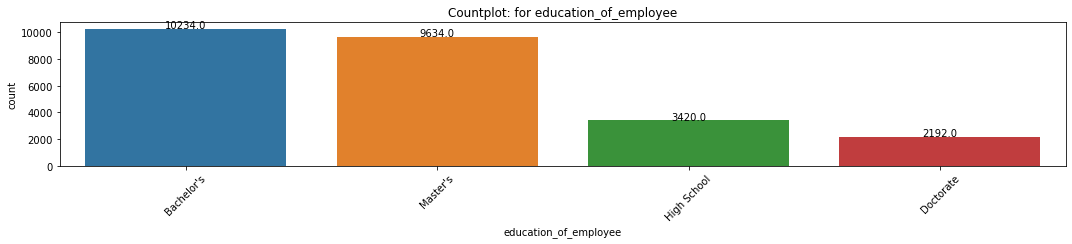

Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: education_of_employee, dtype: float64

In [34]:
# Countplot for education_of_employee
output_pretty_countplot(df, 'education_of_employee', \
                        order=df['education_of_employee'].value_counts().index)
df['education_of_employee'].value_counts(normalize=True)

#### Observations
- Applicants that have Bachelor's are the leading education type with 40.1% while those with a Doctorate are the fewest with 8.6%.

#### Let's investigate has_job_experience

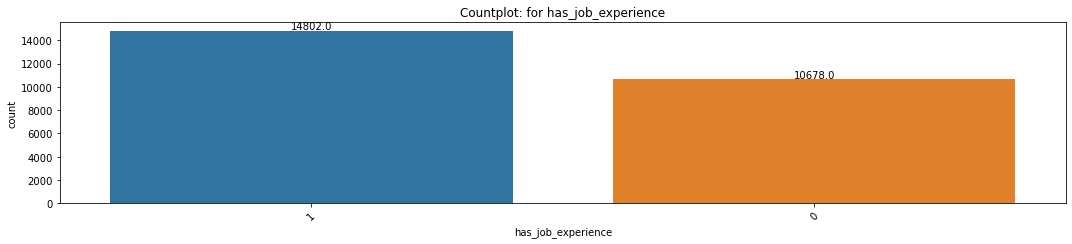

1    0.580926
0    0.419074
Name: has_job_experience, dtype: float64

In [35]:
# Countplot for has_job_experience
output_pretty_countplot(df, 'has_job_experience', \
                        order=df['has_job_experience'].value_counts().index)
df['has_job_experience'].value_counts(normalize=True)

#### Observations
- 58% of the applicants have prior job experience while 41.9% do not.

#### Let's investigate requires_job_training

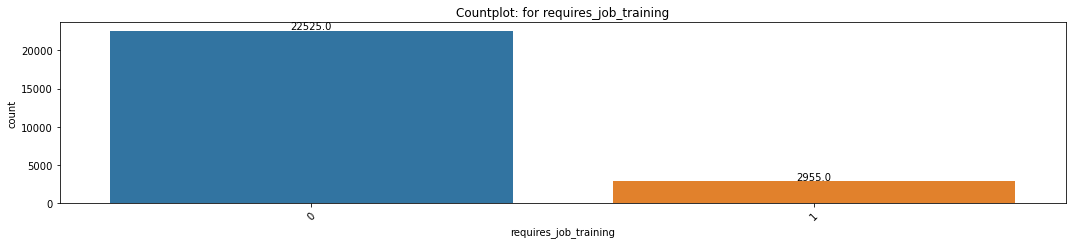

0    0.884027
1    0.115973
Name: requires_job_training, dtype: float64

In [36]:
# Countplot for requires_job_training
output_pretty_countplot(df, 'requires_job_training', \
                        order=df['requires_job_training'].value_counts().index)
df['requires_job_training'].value_counts(normalize=True)

#### Observations
- 88.4% of applicants do not require job training while 11.5% do.

#### Let's investigate region_of_employment

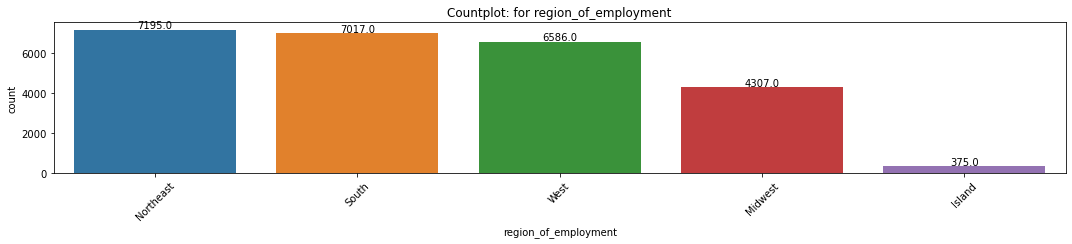

Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: region_of_employment, dtype: float64

In [37]:
# Countplot for region_of_employment
output_pretty_countplot(df, 'region_of_employment', \
                        order=df['region_of_employment'].value_counts().index)
df['region_of_employment'].value_counts(normalize=True)

#### Observations
- The most popular region of employment is the Northeast which has 28.2% while Island is the least popular region with 1.4%.

#### Let's investigate unit_of_wage

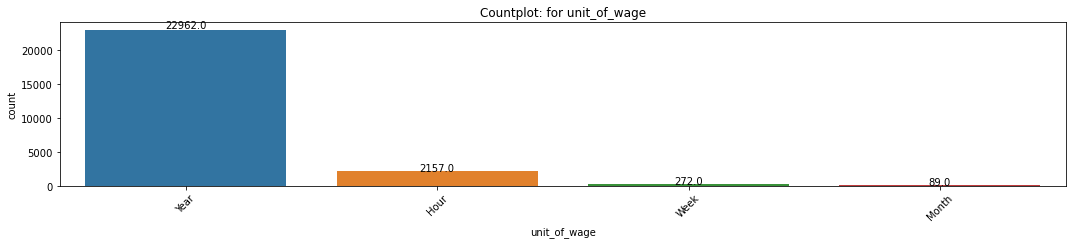

Year     0.901177
Hour     0.084655
Week     0.010675
Month    0.003493
Name: unit_of_wage, dtype: float64

In [38]:
# Countplot for unit_of_wage
output_pretty_countplot(df, 'unit_of_wage', \
                        order=df['unit_of_wage'].value_counts().index)
df['unit_of_wage'].value_counts(normalize=True)

#### Observations
- The most popular unit of wage is Year with 90.1% and Monthly is the least popular with .3%.

#### Let's investigate full_time_position

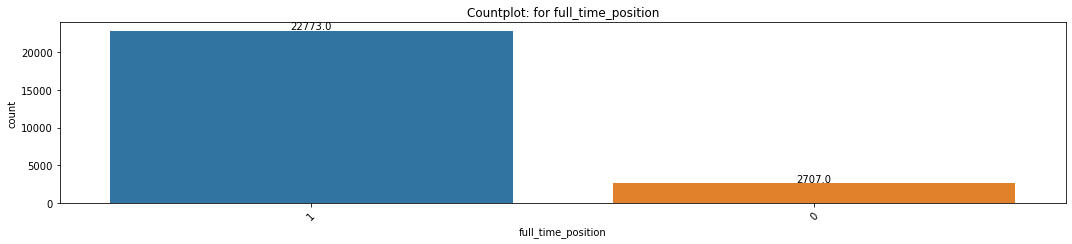

1    0.89376
0    0.10624
Name: full_time_position, dtype: float64

In [39]:
# Countplot for full_time_position
output_pretty_countplot(df, 'full_time_position', \
                        order=df['full_time_position'].value_counts().index)
df['full_time_position'].value_counts(normalize=True)

#### Observations
- 89.3% of the applicants have Full time work while 10.6% do not.

#### Let's investigate case_status

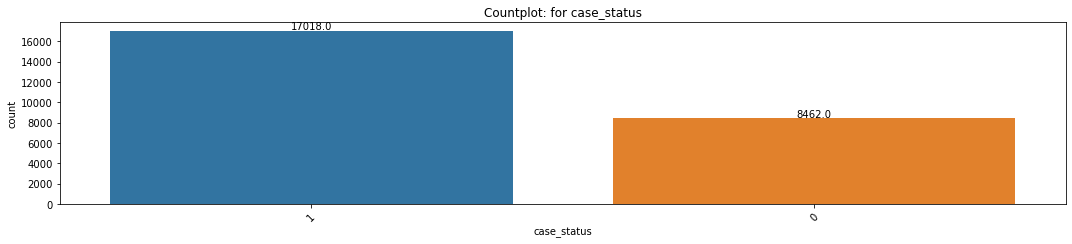

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [40]:
# Countplot for case_status
output_pretty_countplot(df, 'case_status', \
                        order=df['case_status'].value_counts().index)
df['case_status'].value_counts(normalize=True)

#### Observations
- 66.7% of the applicants are certified while 33.2% are not indicating that the dependent variable is imbalanced.

#### Let's investigate no_of_employees

count     25480.000000
mean       5643.667347
std       22339.392078
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      475000.000000
Name: no_of_employees, dtype: float64


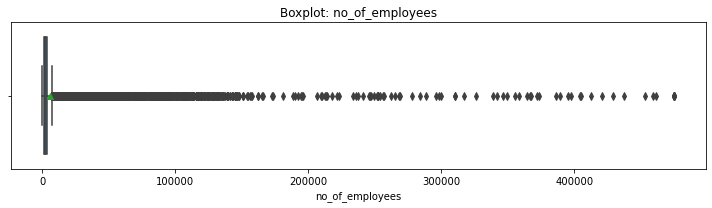

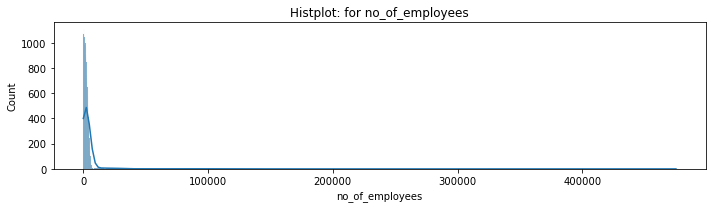

In [41]:
# Boxplot and Histplot for no_of_employees
output_pretty_numeric_plots(df, 'no_of_employees')

#### Observations
- The min no_of_employees is 11 while the max is 475000.
- The mean no_of_employees is 5643.66 which is greater then the median indicating the data is right skewed.
- no_of_employees has outliers.

#### Let's investigate years_open

count    25480.000000
mean        36.559184
std         42.242772
min          0.000000
25%         11.000000
50%         19.000000
75%         40.000000
max        200.000000
Name: years_open, dtype: float64


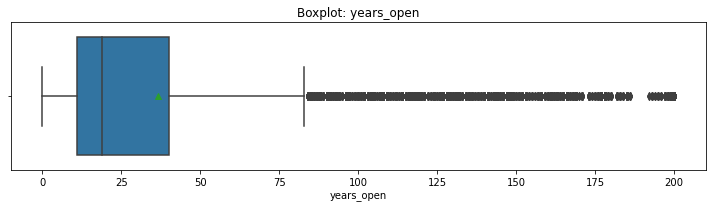

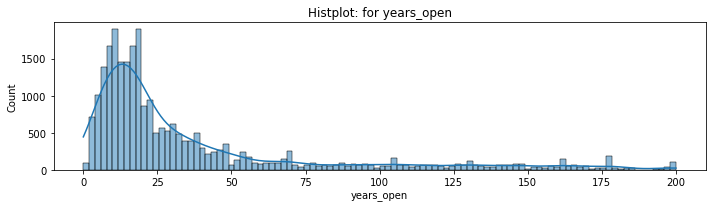

In [42]:
# Boxplot and Histplot for years_open
output_pretty_numeric_plots(df, 'years_open')

#### Observations
- The min years_open is 0 while the max is 200.
- The mean years_open is 36.55 which is greater then the median indicating the data is right skewed.
- years_open has outliers.

#### Let's investigate prevailing_wage

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64


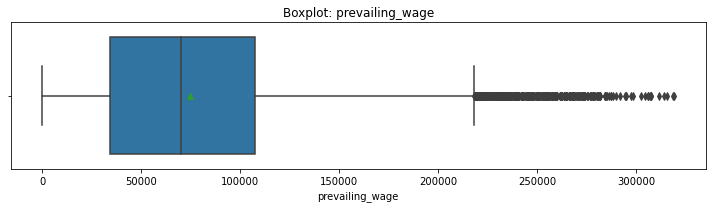

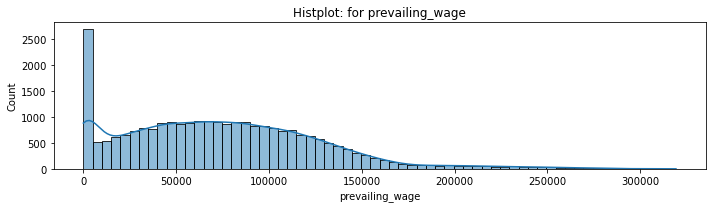

In [43]:
# Boxplot and Histplot for prevailing_wage
output_pretty_numeric_plots(df, 'prevailing_wage')

#### Observations
- The min prevailing_wage is 2.13 while the max is 319210.27.
- The mean prevailing_wage is 74455.81 which is greater then the median indicating the data is right skewed.
- prevailing_wage has outliers. One of the causes is that there is not a consistent unit of wage for all wages and some of the applicants could be part time workers so a consistent annual wage can't be correctly calculated.
- The large spike in the left tail of the distribution more than likely represents hourly worker wages.

### Bivariate Analysis

#### Let's investigate correlation

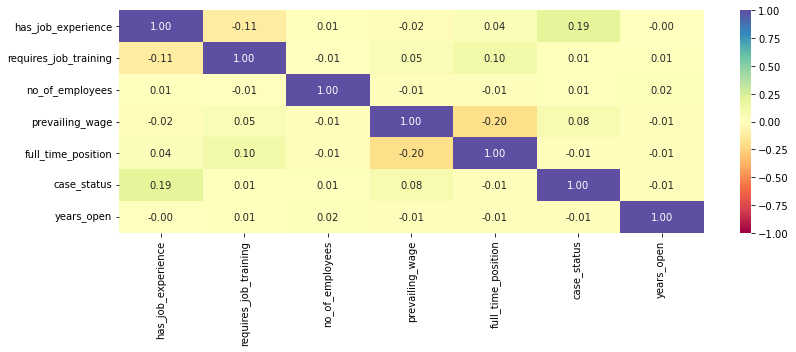

In [44]:
plt.figure(figsize=(12, 5))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
- The is a slight negative correlation of -.20 with full_time_position and prevailing_wage.

#### Let's investigate continent vs education_of_employee

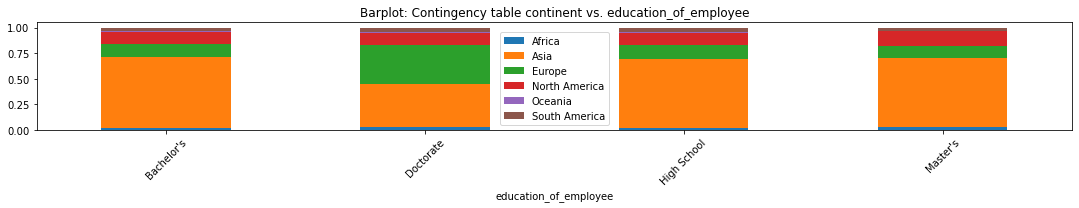

continent,Africa,Asia,Europe,North America,Oceania,South America
education_of_employee,,,,,,
Bachelor's,0.013973,0.700410,0.126930,0.119699,0.006449,0.032539
Doctorate,0.024635,0.421077,0.385949,0.117701,0.010036,0.040602
High School,0.019298,0.669591,0.143275,0.117251,0.010526,0.040058
Master's,0.029894,0.672618,0.113868,0.146149,0.007058,0.030413


In [45]:
# crosstab plot of continent vs education_of_employee
output_pretty_crosstab_plot('Barplot: Contingency table continent vs. education_of_employee', \
                            df['education_of_employee'], df['continent'])

#### Observations
- Asia has the majority of applicants with Bachelor's education with 70% while Oceania has the least with .6%.
- Asia has the majority of applicants with Doctorate education with 42% while Oceania has the least with 1%.
- Asia has the majority of applicants with High School education with 66.9% while Oceania has the least with 1%.
- Asia has the majority of applicants with Master's with 67% while Oceania has the least with .7%.

#### Let's investigate continent vs has_job_experience

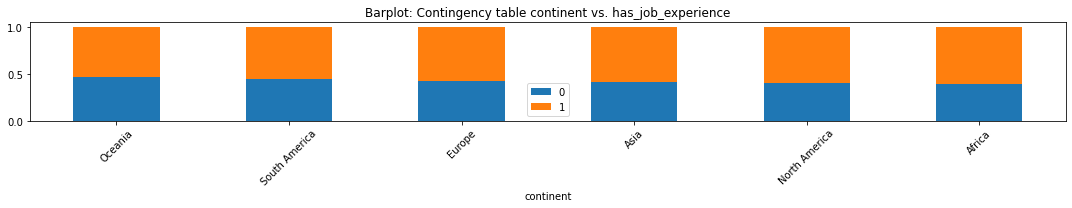

has_job_experience,0,1
continent,,
Oceania,0.463542,0.536458
South America,0.442488,0.557512
Europe,0.422294,0.577706
Asia,0.419370,0.580630
North America,0.409478,0.590522
Africa,0.393829,0.606171


In [46]:
# crosstab plot of continent vs has_job_experience
output_pretty_crosstab_plot('Barplot: Contingency table continent vs. has_job_experience', \
                            df['continent'], df['has_job_experience'], sort_key=1)

#### Observations
- Africa has the highest percentage of applicants with job experience with 60.6% while Oceania has the least with 53.6%.

#### Let's investigate continent vs requires_job_training

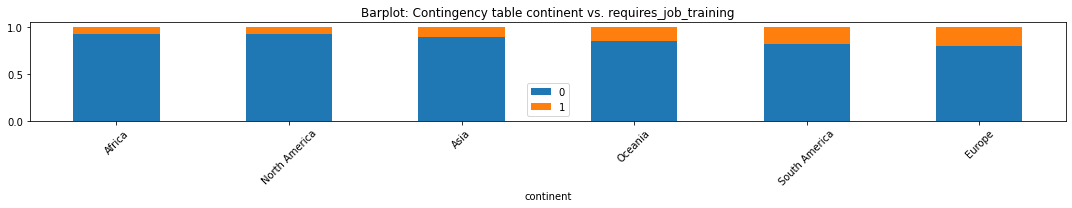

requires_job_training,0,1
continent,,
Africa,0.925590,0.074410
North America,0.924666,0.075334
Asia,0.896329,0.103671
Oceania,0.848958,0.151042
South America,0.823944,0.176056
Europe,0.801983,0.198017


In [47]:
# crosstab plot of continent vs requires_job_training
output_pretty_crosstab_plot('Barplot: Contingency table continent vs. requires_job_training', \
                            df['continent'], df['requires_job_training'], sort_key=1)

#### Observations
- Europe has the highest percentage of applicants that require job training with 19.8% while Africa has the lowest with 7.4%.

#### Let's investigate continent vs region_of_employment

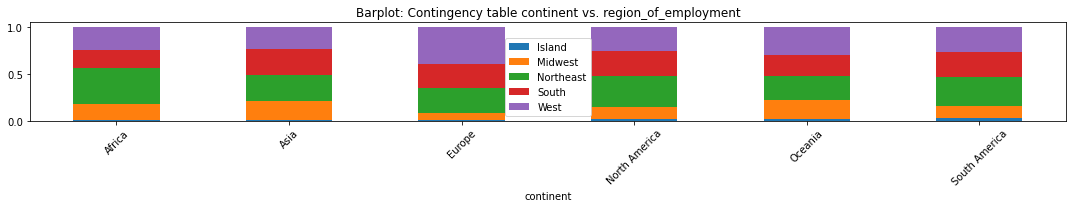

region_of_employment,Island,Midwest,Northeast,South,West
continent,,,,,
Africa,0.014519,0.166969,0.384755,0.185118,0.248639
Asia,0.013404,0.199929,0.272167,0.284977,0.229524
Europe,0.008574,0.081190,0.258574,0.260718,0.390943
North America,0.024909,0.119077,0.338396,0.264277,0.253341
Oceania,0.020833,0.197917,0.255208,0.229167,0.296875
South America,0.026995,0.130282,0.312207,0.261737,0.268779


In [48]:
# crosstab plot of continent vs region_of_employment
output_pretty_crosstab_plot('Barplot: Contingency table continent vs. region_of_employment', \
                            df['continent'], df['region_of_employment'])

#### Observations
- The most popular region of employment for African applicants is West with 24.8% and the lowest is Island with 1.4%.
- The most popular region of employment for Asian applicants is South with 28.4% and the lowest is Island with 1.3%.
- The most popular region of employment for European applicants is West with 39% and the lowest is Island with .8%.
- The most popular region of employment for North American applicants is Northeast with 33.8% and the lowest is Island with 2.4%.
- The most popular region of employment for Oceanian applicants is West with 29.6% and the lowest is Island with 2%.
- The most popular region of employment for South American applicants is Northeast with 31.2% and the lowest is Island with 2.6%.

#### Let's investigate continent vs unit_of_wage

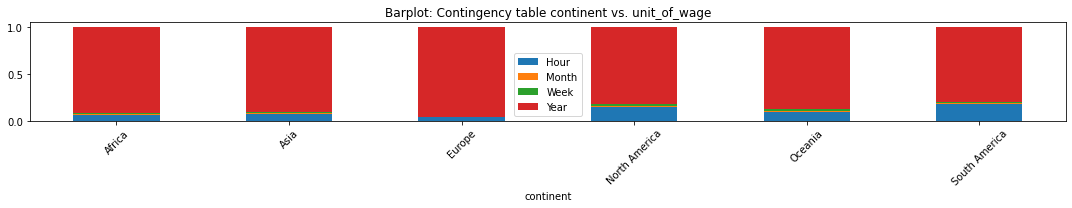

unit_of_wage,Hour,Month,Week,Year
continent,,,,
Africa,0.065336,0.005445,0.014519,0.914701
Asia,0.077753,0.003440,0.009134,0.909673
Europe,0.037513,0.001876,0.004555,0.956056
North America,0.150365,0.005164,0.022783,0.821689
Oceania,0.093750,0.010417,0.020833,0.875000
South America,0.184272,0.002347,0.016432,0.796948


In [49]:
# crosstab plot of continent vs unit_of_wage
output_pretty_crosstab_plot('Barplot: Contingency table continent vs. unit_of_wage', \
                            df['continent'], df['unit_of_wage'])

#### Observations
- The most popular unit of wage for African applicants is Year with 91.4% and the lowest is Week with 1.4%.
- The most popular unit of wage for Asian applicants is Year with 90.9% and the lowest is Month with .3%.
- The most popular unit of wage for European applicants is Year with 95.6% and the lowest is Month with .1%.
- The most popular unit of wage for North American applicants is Year with 82.1% and the lowest is Month with .5%.
- The most popular unit of wage for Oceanian applicants is Year with 87.5% and the lowest is Month with 1%.
- The most popular unit of wage for South American applicants is Year with 79.6% and the lowest is Month with .2%.

#### Let's investigate continent vs full_time_position

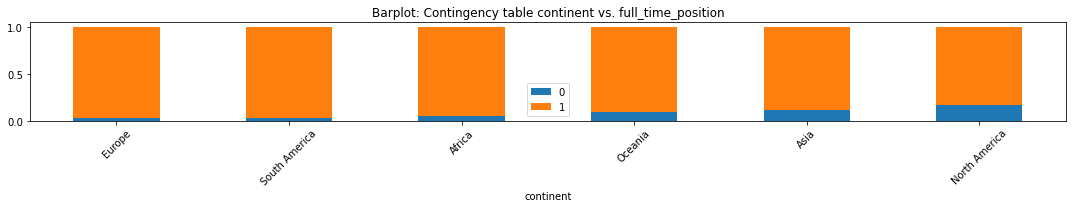

full_time_position,0,1
continent,,
Europe,0.030815,0.969185
South America,0.036385,0.963615
Africa,0.056261,0.943739
Oceania,0.093750,0.906250
Asia,0.115118,0.884882
North America,0.173451,0.826549


In [50]:
# crosstab plot of continent vs full_time_position
output_pretty_crosstab_plot('Barplot: Contingency table continent vs. full_time_position', \
                            df['continent'], df['full_time_position'], sort_key=1, ascending=False)

#### Observations
- European applicants have the highest percentage of applicants with full time position with 96.9% while North America have the lowest with 82.6%.

#### Let's investigate education_of_employee vs requires_job_training

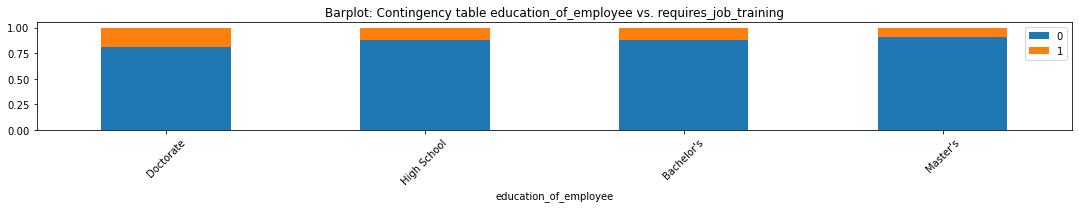

requires_job_training,0,1
education_of_employee,,
Doctorate,0.811131,0.188869
High School,0.874269,0.125731
Bachelor's,0.876588,0.123412
Master's,0.911978,0.088022


In [51]:
# crosstab plot of education_of_employee vs requires_job_training
output_pretty_crosstab_plot('Barplot: Contingency table education_of_employee vs. requires_job_training', \
                            df['education_of_employee'], df['requires_job_training'],\
                            sort_key=1, ascending=False)

#### Observations
- Applicants with Doctorate level education have the highest percentage requires job training with 18.8% while applicants with a Master's had the lowest with 8.8%.

#### Let's investigate education_of_employee vs region_of_employment

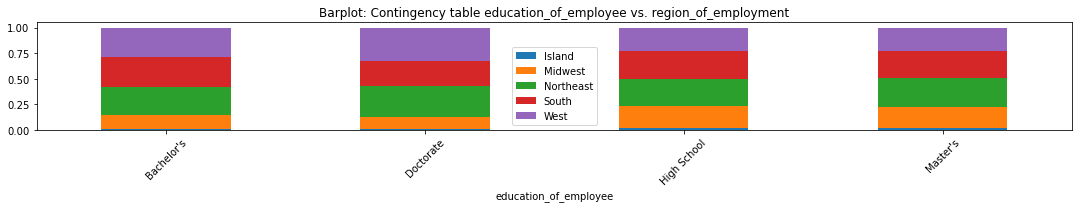

region_of_employment,Island,Midwest,Northeast,South,West
education_of_employee,,,,,
Bachelor's,0.012605,0.128493,0.280829,0.292261,0.285812
Doctorate,0.011405,0.116788,0.299270,0.246807,0.325730
High School,0.017544,0.215205,0.264620,0.273099,0.229532
Master's,0.016712,0.207598,0.286485,0.264791,0.224414


In [52]:
# crosstab plot of education_of_employee vs region_of_employment
output_pretty_crosstab_plot('Barplot: Contingency table education_of_employee vs. region_of_employment', \
                            df['education_of_employee'], df['region_of_employment'])

#### Observations
- The South has the highest percentage of Bachelor applicants with 29.2% while the Island has the lowest with 1.2%.
- The West has the highest percentage of Doctorate applicants with 32.5% while the Island has the lowest with 1.1%.
- The South has the highest percentage of High School applicants with 27.3% while the Island has the lowest with 1.7%.
- The Northeast has the highest percentage of Master's applicants with 28.6% while the Island has the lowest with 1.6%.

#### Let's investigate education_of_employee vs unit_of_wage

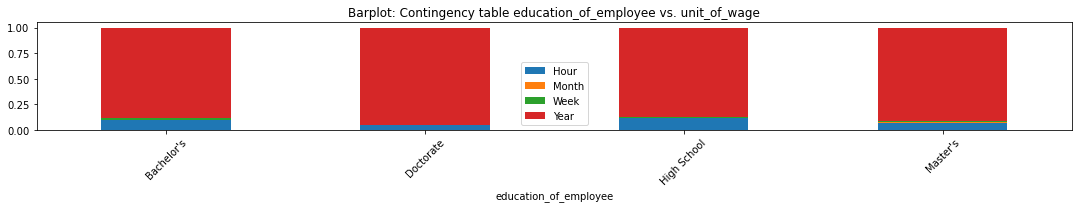

unit_of_wage,Hour,Month,Week,Year
education_of_employee,,,,
Bachelor's,0.095857,0.004006,0.012312,0.887825
Doctorate,0.043796,0.002281,0.003650,0.950274
High School,0.115497,0.003801,0.009357,0.871345
Master's,0.071102,0.003114,0.011003,0.914781


In [53]:
# crosstab plot of education_of_employee vs unit_of_wage
output_pretty_crosstab_plot('Barplot: Contingency table education_of_employee vs. unit_of_wage', \
                            df['education_of_employee'], df['unit_of_wage'])

#### Observations
- The most popular unit of wage for applicants with a Bachelor's is Year with 88.7% and the least popular is Month with .4%.
- The most popular unit of wage for applicants with a Doctorate is Year with 95% and the least popular is Month with .2%.
- The most popular unit of wage for applicants with a High School is Year with 87.1% and the least popular is Month with .3%.
- The most popular unit of wage for applicants with a Master's is Year with 91.4% and the least popular is Month with .3%.

#### Let's investigate education_of_employee vs full_time_position

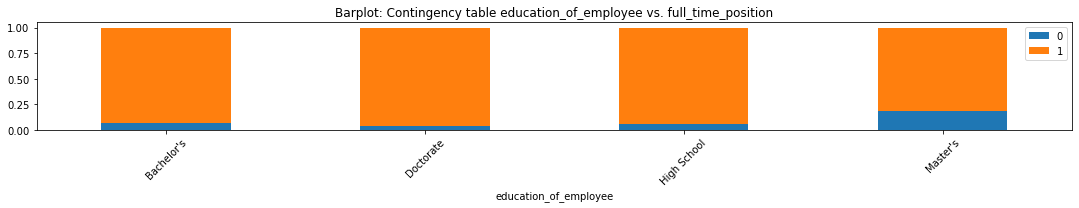

full_time_position,0,1
education_of_employee,,
Bachelor's,0.066738,0.933262
Doctorate,0.036496,0.963504
High School,0.060234,0.939766
Master's,0.180403,0.819597


In [54]:
# crosstab plot of education_of_employee vs full_time_position
output_pretty_crosstab_plot('Barplot: Contingency table education_of_employee vs. full_time_position', \
                            df['education_of_employee'], df['full_time_position'])

#### Observations
- Of all the education levels Doctorate had the highest percentage with full time positions with 96.3% while Masters had the lowest with 81.9%.

#### Let's investigate has_job_experience vs unit_of_wage

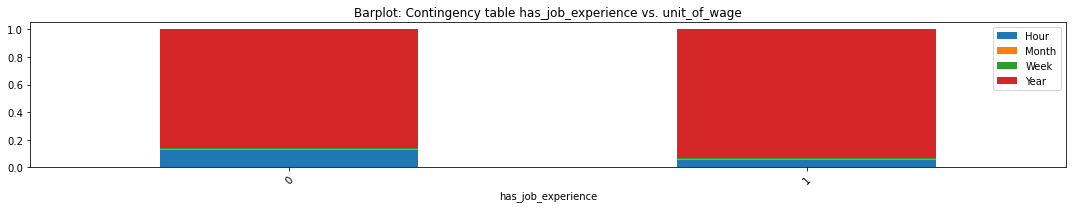

unit_of_wage,Hour,Month,Week,Year
has_job_experience,,,,
0,0.127833,0.002997,0.006836,0.862334
1,0.053506,0.003851,0.013444,0.929199


In [55]:
# crosstab plot of has_job_experience vs unit_of_wage
output_pretty_crosstab_plot('Barplot: Contingency table has_job_experience vs. unit_of_wage', \
                            df['has_job_experience'], df['unit_of_wage'])

#### Observations
- 86.2% of the applicants with no job experience have a unit of wage of Year while .29% have a unit of wage of Month.
- 92.9% of the applicants with job experience have a unit of wage of Year while .38% have a unit of wage of Month.

#### Let's investigate requires_job_training vs region_of_employment

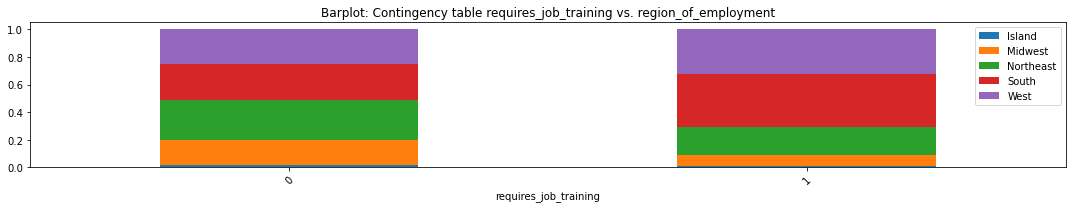

region_of_employment,Island,Midwest,Northeast,South,West
requires_job_training,,,,,
0,0.015671,0.180866,0.292519,0.260910,0.250033
1,0.007445,0.078849,0.205076,0.385787,0.322843


In [56]:
# crosstab plot of requires_job_training vs region_of_employment
output_pretty_crosstab_plot('Barplot: Contingency table requires_job_training vs. region_of_employment', \
                            df['requires_job_training'], df['region_of_employment'])

#### Observations
- The South had the highest level of applicants requiring job training of 38.5% while the Island had .7%.
- This could be due to the finding that the South has the highest level of High School education level applicants.

#### Let's investigate requires_job_training vs unit_of_wage

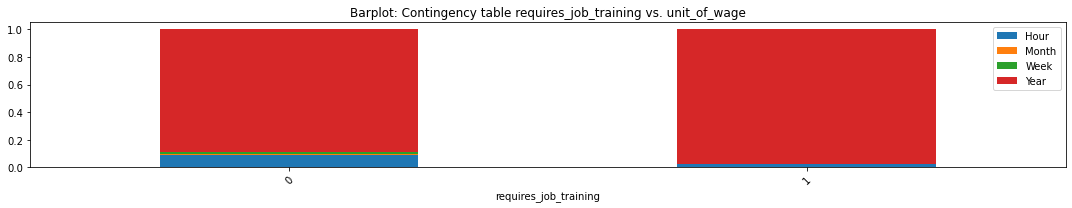

unit_of_wage,Hour,Month,Week,Year
requires_job_training,,,,
0,0.092608,0.003774,0.011853,0.891765
1,0.024027,0.001354,0.001692,0.972927


In [57]:
# crosstab plot of requires_job_training vs unit_of_wage
output_pretty_crosstab_plot('Barplot: Contingency table requires_job_training vs. unit_of_wage', \
                            df['requires_job_training'], df['unit_of_wage'])

#### Observations
- The most popular unit of wage for those applicants not requiring job training is Year with 89.1% while the least popular is Month with .37%.
- The most popular unit of wage for those applicants requiring job training is Year with 97.2% while the least popular is Month with .13%.

#### Let's investigate requires_job_training vs full_time_position

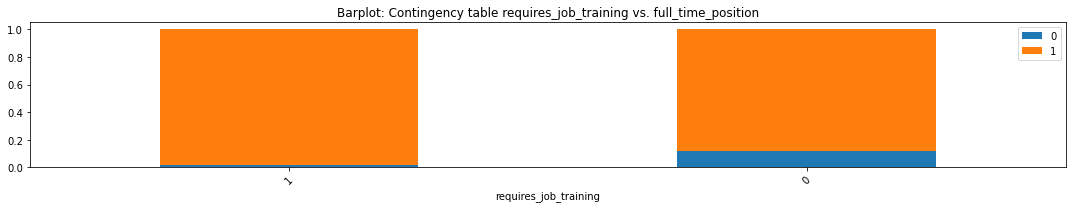

full_time_position,0,1
requires_job_training,,
1,0.017259,0.982741
0,0.117913,0.882087


In [58]:
# crosstab plot of requires_job_training vs full_time_position
output_pretty_crosstab_plot('Barplot: Contingency table requires_job_training vs. full_time_position', \
                            df['requires_job_training'], df['full_time_position'], sort_key=1, ascending=False)

#### Observations
- 98.2% of those not requiring job training have full time positions.
- 88.2% of those requiring job training have full time positions.

#### Let's investigate requires_job_training vs case_status

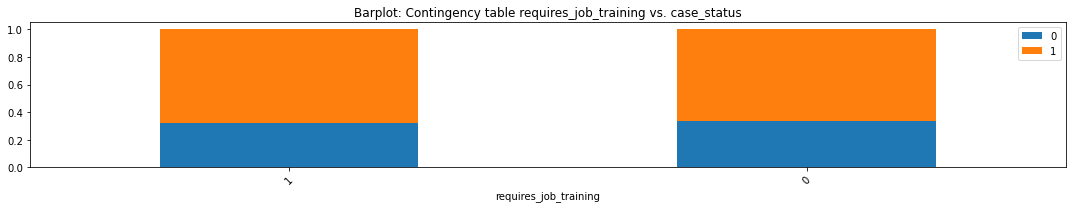

case_status,0,1
requires_job_training,,
1,0.321151,0.678849
0,0.333541,0.666459


In [59]:
# crosstab plot of requires_job_training vs case_status
output_pretty_crosstab_plot('Barplot: Contingency table requires_job_training vs. case_status', \
                            df['requires_job_training'], df['case_status'], sort_key=1, ascending=False)

#### Observations
- 67.8% of those requiring job training were certified for visas.
- 66.6% of those not requiring job training were certified for visas.

#### Let's investigate region_of_employment vs full_time_position

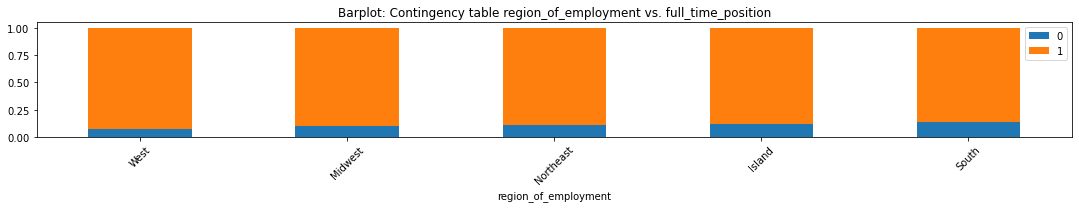

full_time_position,0,1
region_of_employment,,
West,0.071819,0.928181
Midwest,0.104481,0.895519
Northeast,0.111744,0.888256
Island,0.120000,0.880000
South,0.133248,0.866752


In [60]:
# crosstab plot of region_of_employment vs full_time_position
output_pretty_crosstab_plot('Barplot: Contingency table region_of_employment vs. full_time_position', \
                            df['region_of_employment'], df['full_time_position'], sort_key=1, ascending=False)

#### Observations
- The West had the highest percentage of full time employment with 92.8% while the South had the lowest with 86.6%.

#### Let's investigate region_of_employment vs case_status

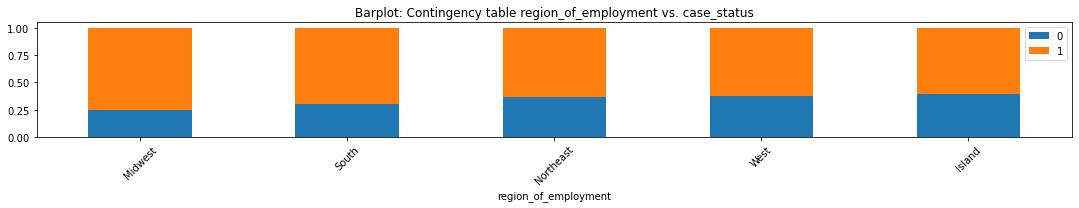

case_status,0,1
region_of_employment,,
Midwest,0.244718,0.755282
South,0.299843,0.700157
Northeast,0.370952,0.629048
West,0.377467,0.622533
Island,0.397333,0.602667


In [61]:
# crosstab plot of region_of_employment vs case_status
output_pretty_crosstab_plot('Barplot: Contingency table region_of_employment vs. case_status', \
                            df['region_of_employment'], df['case_status'], sort_key=1, ascending=False)

#### Observations
- Applicants in the Midwest region had the highest visa certification rate with 75.5% versus Island which had the lowest with 60.2%.

#### Let's investigate full_time_position vs case_status

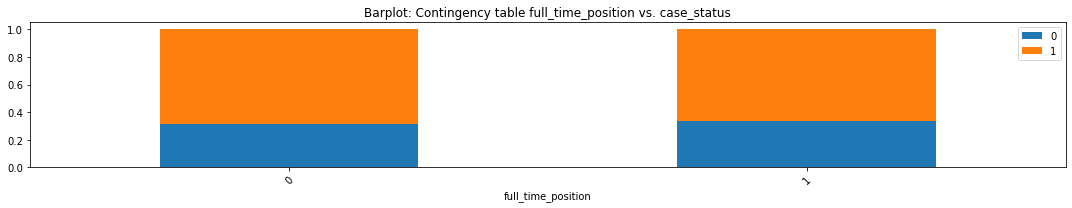

case_status,0,1
full_time_position,,
0,0.314740,0.685260
1,0.334168,0.665832


In [62]:
# crosstab plot of full_time_position vs case_status
output_pretty_crosstab_plot('Barplot: Contingency table full_time_position vs. case_status', \
                            df['full_time_position'], df['case_status'])

#### Observations
- 68.5% of applicants who did not have a full time position were certified while 66.5% of applicants with a full time position were certified.

#### Let's investigate has_job_experience vs requires_job_training

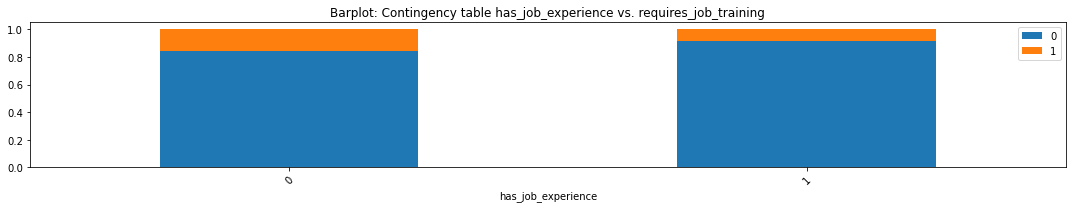

requires_job_training,0,1
has_job_experience,,
0,0.841731,0.158269
1,0.914539,0.085461


In [63]:
# crosstab plot of has_job_experience vs requires_job_training
output_pretty_crosstab_plot('Barplot: Contingency table has_job_experience vs. requires_job_training', \
                            df['has_job_experience'], df['requires_job_training'])

#### Observations
- 15.8% of those applicants with no job experience required job training. 
- 8.5% of those applicants with job experience required job training. 

#### Let's investigate unit_of_wage vs no_of_employees

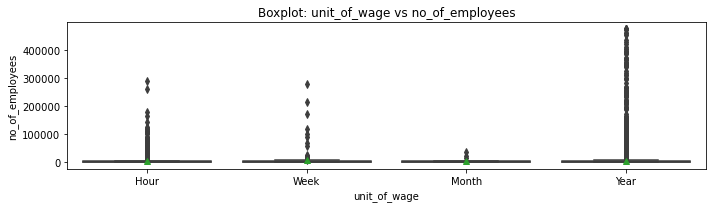

,count,mean,std,min,25%,50%,75%,max
unit_of_wage,,,,,,,,
Year,22962.0,5777.287170,22904.718382,11.0,1037.0,2146.0,3566.50,475000.0
Month,89.0,2759.595506,4529.557952,46.0,879.0,2101.0,3014.00,36511.0
Week,272.0,6582.580882,26231.867394,64.0,1019.0,1950.0,3338.25,278152.0
Hour,2157.0,4221.840519,14847.408417,14.0,877.0,1836.0,2974.00,288512.0


In [64]:
# Boxplot unit_of_wage vs no_of_employees
sort_index = df.groupby('unit_of_wage')[['no_of_employees']].median().sort_values(by='no_of_employees').index
output_pretty_boxplot(df, x='unit_of_wage', y='no_of_employees',\
                     order=sort_index);
describe_df = df.groupby(['unit_of_wage'])['no_of_employees'].describe()
describe_df.sort_values(by='50%', ascending=False)

#### Observations
- no_of_employees value for all units of wage have outliers.

- Min no_of_employees value for Hour unit_of_wage is 14.000 and max is 288512.000
- Mean no_of_employees for Hour unit_of_wage is 4221.841 which is greater than the median indicating the data is right skewed.


- Min no_of_employees value for Month unit_of_wage is 46.000 and max is 36511.000
- Mean no_of_employees for Month unit_of_wage is 2759.596 which is greater than the median indicating the data is right skewed.


- Min no_of_employees value for Week unit_of_wage is 64.000 and max is 278152.000
- Mean no_of_employees for Week unit_of_wage is 6582.581 which is greater than the median indicating the data is right skewed.


- Min no_of_employees value for Year unit_of_wage is 11.000 and max is 475000.000
- Mean no_of_employees for Year unit_of_wage is 5777.287 which is greater than the median indicating the data is right skewed.

#### Let's investigate continent vs years_open

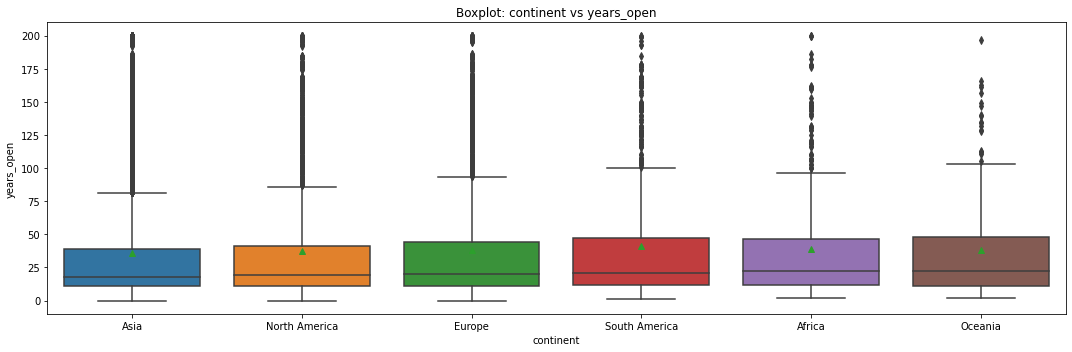

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,551.0,38.573503,41.563594,2.0,12.0,22.0,46.50,200.0
Oceania,192.0,37.963542,40.969708,2.0,11.0,22.0,48.00,197.0
South America,852.0,41.474178,46.238899,1.0,12.0,21.0,47.25,200.0
Europe,3732.0,38.509646,43.703819,0.0,11.0,20.0,44.00,200.0
North America,3292.0,37.398238,43.223968,0.0,11.0,19.0,41.00,200.0
Asia,16861.0,35.633474,41.506882,0.0,11.0,18.0,39.00,200.0


In [65]:
# Boxplot continent vs years_open
sort_index = df.groupby('continent')[['years_open']].median().sort_values(by='years_open').index
output_pretty_boxplot(df, x='continent', y='years_open',\
                     figsize=(15,5), order=sort_index);
describe_df = df.groupby(['continent'])['years_open'].describe()
describe_df.sort_values(by='50%', ascending=False)

#### Observations
- South America has the highest mean years open with 41.47 while Asia had the lowest with 35.63.
- years_open for all continents have outliers.


- Min years_open value for Africa continent is 2.000 and max is 200.000
- Mean years_open for Africa continent is 38.574 which is greater than the median indicating the data is right skewed.


- Min years_open value for Asia continent is 0.000 and max is 200.000
- Mean years_open for Asia continent is 35.633 which is greater than the median indicating the data is right skewed.


- Min years_open value for Europe continent is 0.000 and max is 200.000
- Mean years_open for Europe continent is 38.510 which is greater than the median indicating the data is right skewed.


- Min years_open value for North America continent is 0.000 and max is 200.000
- Mean years_open for North America continent is 37.398 which is greater than the median indicating the data is right skewed.


- Min years_open value for Oceania continent is 2.000 and max is 197.000
- Mean years_open for Oceania continent is 37.964 which is greater than the median indicating the data is right skewed.


- Min years_open value for South America continent is 1.000 and max is 200.000
- Mean years_open for South America continent is 41.474 which is greater than the median indicating the data is right skewed.

#### Let's investigate case_status vs years_open

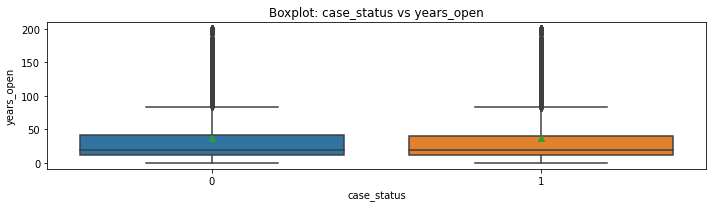

years_open                                                    
                 count       mean        std  min   25%   50%   75%    max
case_status                                                               
0               8462.0  37.069723  42.394602  0.0  12.0  19.0  41.0  200.0
1              17018.0  36.305324  42.166019  0.0  11.0  19.0  40.0  200.0

In [66]:
# Boxplot case_status vs years_open
output_pretty_boxplot(df, x='case_status', y='years_open');
describe_df = df.groupby(['case_status'])[['years_open']].describe()
describe_df

#### Observations
- Min years_open value for 0 case_status is 0.000 and max is 200.000
- Mean years_open for 0 case_status is 37.070 which is greater than the median indicating the data is right skewed.
- years_open for 0 case_status has outliers.


- Min years_open value for 1 case_status is 0.000 and max is 200.000
- Mean years_open for 1 case_status is 36.305 which is greater than the median indicating the data is right skewed.
- years_open for 1 case_status has outliers.

#### Let's investigate continent vs prevailing_wage

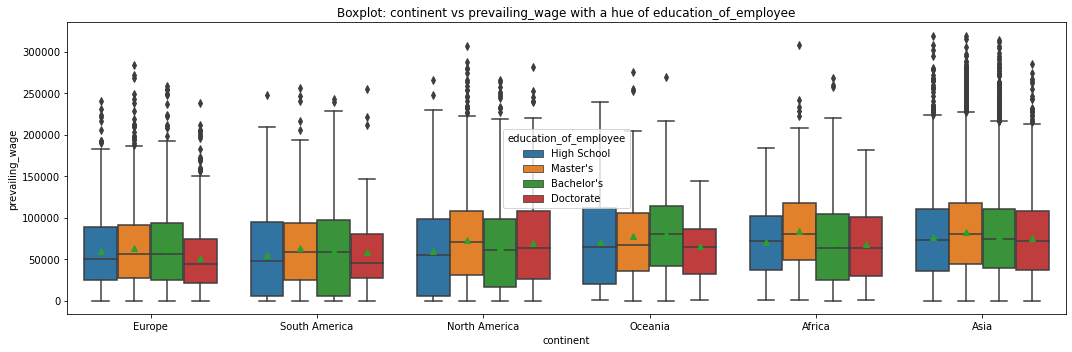

count          mean           std  \
continent     education_of_employee                                       
Africa        Bachelor's              143.0  71032.963717  57356.700541   
              Doctorate                54.0  67933.709815  44997.246754   
              High School              66.0  70666.837111  43866.109008   
              Master's                288.0  83928.952883  48628.888711   
Asia          Bachelor's             7168.0  77513.349839  52310.568941   
              Doctorate               923.0  75893.005321  51136.763916   
              High School            2290.0  77096.896388  54935.330398   
              Master's               6480.0  83172.540425  54471.299762   
Europe        Bachelor's             1299.0  62502.896281  46489.944966   
              Doctorate               846.0  51259.782796  39338.847203   
              High School             490.0  60227.626475  46626.566637   
              Master's               1097.0  63140.587026  46740.666769   
North America Bachelor's             1225.0  64559.885419  52574.619430   
              Doctorate               258.0  69133.766183  53026.839375   
              High School             401.0  59764.841523  52333.878958   
              Master's               1408.0  73285.689083  53816.537486   
Oceania       Bachelor's               66.0  80115.521955  55069.771441   
              Doctorate                22.0  65194.420332  41706.702161   
              High School              36.0  70777.000831  58187.336224   
              Master's                 68.0  78250.402999  61262.584697   
South America Bachelor's              333.0  59739.217337  50819.771528   
              Doctorate                89.0  58018.546335  48297.469723   
              High School             137.0  55254.240097  52393.230364   
              Master's                293.0  63726.680127  51172.847834   

                                          min         25%        50%  \
continent     education_of_employee                                    
Africa        Bachelor's              32.9286  24738.6100  63079.560   
              Doctorate              944.6100  29268.7800  63118.725   
              High School            205.6246  36789.6850  71548.265   
              Master's               100.0100  48858.5725  80363.140   
Asia          Bachelor's               5.6396  39301.1050  74007.605   
              Doctorate               17.4747  36868.1350  71485.110   
              High School             11.3078  35665.4650  73540.070   
              Master's                 3.3188  43493.3825  80132.525   
Europe        Bachelor's               9.1753  24300.6750  56550.830   
              Doctorate               55.7084  21188.1950  44156.650   
              High School             37.1854  25333.8650  49546.265   
              Master's                25.0117  27152.3300  56574.410   
North America Bachelor's               5.1868  16308.1500  60764.210   
              Doctorate                3.4889  25558.5100  62729.610   
              High School              2.9561   5811.2900  55123.020   
              Master's                 2.1367  30617.1975  70395.370   
Oceania       Bachelor's              61.4090  41344.4225  80051.160   
              Doctorate              783.4473  32422.5225  64100.735   
              High School            521.4363  20318.6475  65081.135   
              Master's                24.4888  36182.0600  66393.895   
South America Bachelor's              30.7996   5661.6700  57984.030   
              Doctorate               16.4637  27702.7300  45160.770   
              High School             57.2276   5229.9900  47358.680   
              Master's                 3.0031  24198.9800  58311.870   

                                             75%        max  
continent     education_of_employee                          
Africa        Bachelor's             104521.5650  268713.50  
              Doctorate     

In [67]:
# Boxplot continent vs prevailing_wage
sort_index = df.groupby(['continent'])[['prevailing_wage']].median().sort_values(by='prevailing_wage').index
output_pretty_boxplot(df, x='continent', y='prevailing_wage',hue='education_of_employee',\
                     figsize=(15,5), order=sort_index);
describe_df = df.groupby(['continent','education_of_employee'])['prevailing_wage'].describe()
describe_df

#### Observations
- All prevailing_wages for all continents and all levels of education had outliers except for Oceania with High School education and Africa with High School or Doctorate level education.
- Applicants from Africa with a Master's education had the highest mean prevailing wage of 83928.95 while applicants from Europe with a Doctorate education had the lowest with 51259.78.


- Min prevailing_wage value for Africa continent and Bachelor's education_of_employee is 32.929 and max is 268713.500
- Mean prevailing_wage for Africa continent and Bachelor's education_of_employee is 71032.964 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for Africa continent and Doctorate education_of_employee is 944.610 and max is 180939.800
- Mean prevailing_wage for Africa continent and Doctorate education_of_employee is 67933.710 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for Africa continent and High School education_of_employee is 205.625 and max is 184099.940
- Mean prevailing_wage for Africa continent and High School education_of_employee is 70666.837 which is less than the median indicating the data is left skewed.


- Min prevailing_wage value for Africa continent and Master's education_of_employee is 100.010 and max is 307716.100
- Mean prevailing_wage for Africa continent and Master's education_of_employee is 83928.953 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for Asia continent and Bachelor's education_of_employee is 5.640 and max is 314156.060
- Mean prevailing_wage for Asia continent and Bachelor's education_of_employee is 77513.350 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for Asia continent and Doctorate education_of_employee is 17.475 and max is 285088.160
- Mean prevailing_wage for Asia continent and Doctorate education_of_employee is 75893.005 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for Asia continent and High School education_of_employee is 11.308 and max is 319210.270
- Mean prevailing_wage for Asia continent and High School education_of_employee is 77096.896 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for Asia continent and Master's education_of_employee is 3.319 and max is 318446.050
- Mean prevailing_wage for Asia continent and Master's education_of_employee is 83172.540 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for Europe continent and Bachelor's education_of_employee is 9.175 and max is 259097.550
- Mean prevailing_wage for Europe continent and Bachelor's education_of_employee is 62502.896 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for Europe continent and Doctorate education_of_employee is 55.708 and max is 238109.720
- Mean prevailing_wage for Europe continent and Doctorate education_of_employee is 51259.783 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for Europe continent and High School education_of_employee is 37.185 and max is 240099.970
- Mean prevailing_wage for Europe continent and High School education_of_employee is 60227.626 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for Europe continent and Master's education_of_employee is 25.012 and max is 284328.960
- Mean prevailing_wage for Europe continent and Master's education_of_employee is 63140.587 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for North America continent and Bachelor's education_of_employee is 5.187 and max is 265168.900
- Mean prevailing_wage for North America continent and Bachelor's education_of_employee is 64559.885 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for North America continent and Doctorate education_of_employee is 3.489 and max is 281590.410
- Mean prevailing_wage for North America continent and Doctorate education_of_employee is 69133.766 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for North America continent and High School education_of_employee is 2.956 and max is 265969.800
- Mean prevailing_wage for North America continent and High School education_of_employee is 59764.842 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for North America continent and Master's education_of_employee is 2.137 and max is 306206.670
- Mean prevailing_wage for North America continent and Master's education_of_employee is 73285.689 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for Oceania continent and Bachelor's education_of_employee is 61.409 and max is 269645.300
- Mean prevailing_wage for Oceania continent and Bachelor's education_of_employee is 80115.522 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for Oceania continent and Doctorate education_of_employee is 783.447 and max is 143640.360
- Mean prevailing_wage for Oceania continent and Doctorate education_of_employee is 65194.420 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for Oceania continent and High School education_of_employee is 521.436 and max is 239773.630
- Mean prevailing_wage for Oceania continent and High School education_of_employee is 70777.001 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for Oceania continent and Master's education_of_employee is 24.489 and max is 275926.270
- Mean prevailing_wage for Oceania continent and Master's education_of_employee is 78250.403 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for South America continent and Bachelor's education_of_employee is 30.800 and max is 243190.470
- Mean prevailing_wage for South America continent and Bachelor's education_of_employee is 59739.217 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for South America continent and Doctorate education_of_employee is 16.464 and max is 254604.080
- Mean prevailing_wage for South America continent and Doctorate education_of_employee is 58018.546 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for South America continent and High School education_of_employee is 57.228 and max is 247393.010
- Mean prevailing_wage for South America continent and High School education_of_employee is 55254.240 which is greater than the median indicating the data is right skewed.


- Min prevailing_wage value for South America continent and Master's education_of_employee is 3.003 and max is 255771.260
- Mean prevailing_wage for South America continent and Master's education_of_employee is 63726.680 which is greater than the median indicating the data is right skewed.

#### Let's investigate education_of_employee vs prevailing_wage

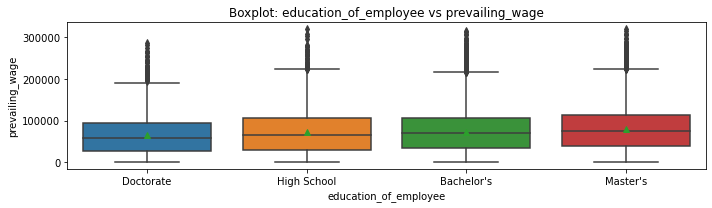

,count,mean,std,min,25%,50%,75%,max
education_of_employee,,,,,,,,
Master's,9634.0,78843.057843,53815.339531,2.1367,38660.8575,75020.590,112344.8925,318446.05
Bachelor's,10234.0,73405.443735,52083.793080,5.1868,33545.3625,69825.710,106453.3350,314156.06
High School,3420.0,71582.147756,53834.844381,2.9561,28792.2000,66204.710,106397.9875,319210.27
Doctorate,2192.0,64561.076657,48096.890741,3.4889,27026.8125,57543.625,93744.7700,285088.16


In [68]:
# Boxplot education_of_employee vs prevailing_wage
sort_index = df.groupby('education_of_employee')[['prevailing_wage']].median().sort_values(by='prevailing_wage').index
output_pretty_boxplot(df, x='education_of_employee', y='prevailing_wage', order=sort_index);
describe_df = df.groupby(['education_of_employee'])['prevailing_wage'].describe()
describe_df.sort_values(by='50%', ascending=False)

#### Observations
- Those with Master's level education has the highest mean prevailing wage of 78843.05 while those with a Doctorate had the lowest with 64561.07.
- This indicates in terms of prevailing wage that education is important however past a certain point it has a negative effect on prevailing wage (i.e. lots of education but not enough 'real world' experience). 


- Min prevailing_wage value for Bachelor's education_of_employee is 5.187 and max is 314156.060
- Mean prevailing_wage for Bachelor's education_of_employee is 73405.444 which is greater than the median indicating the data is right skewed.
- prevailing_wage value for Bachelor's education_of_employee has outliers.


- Min prevailing_wage value for Doctorate education_of_employee is 3.489 and max is 285088.160
- Mean prevailing_wage for Doctorate education_of_employee is 64561.077 which is greater than the median indicating the data is right skewed.
- prevailing_wage value for Doctorate education_of_employee has outliers.


- Min prevailing_wage value for High School education_of_employee is 2.956 and max is 319210.270
- Mean prevailing_wage for High School education_of_employee is 71582.148 which is greater than the median indicating the data is right skewed.
- prevailing_wage value for High School education_of_employee has outliers.


- Min prevailing_wage value for Master's education_of_employee is 2.137 and max is 318446.050
- Mean prevailing_wage for Master's education_of_employee is 78843.058 which is greater than the median indicating the data is right skewed.
- prevailing_wage value for Master's education_of_employee has outliers.

#### Let's investigate has_job_experience vs prevailing_wage

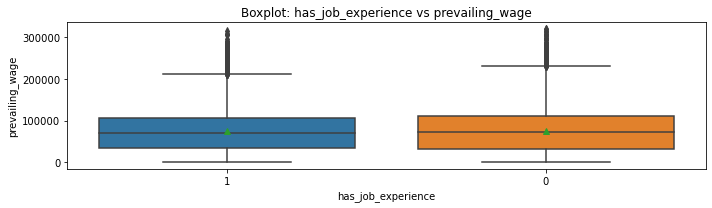

,count,mean,std,min,25%,50%,75%,max
has_job_experience,,,,,,,,
0,10678.0,75464.159920,55522.250615,2.1367,32203.01,72602.290,111288.3925,319210.27
1,14802.0,73728.405363,50763.631630,2.9561,34969.34,69033.665,105427.7875,315497.60


In [69]:
# Boxplot has_job_experience vs prevailing_wage
sort_index = df.groupby('has_job_experience')[['prevailing_wage']].median().sort_values(by='prevailing_wage').index
output_pretty_boxplot(df, x='has_job_experience', y='prevailing_wage', order=sort_index);
describe_df = df.groupby(['has_job_experience'])['prevailing_wage'].describe()
describe_df.sort_values(by='50%', ascending=False)

#### Observations
- The mean prevailing wage for those applicants without job_experience of 75464.15 is 2.35% higher than for those that do have job experience.


- Min prevailing_wage value for 0 has_job_experience is 2.137 and max is 319210.270
- Mean prevailing_wage for 0 has_job_experience is 75464.160 which is greater than the median indicating the data is right skewed.
- prevailing_wage value for 0 has_job_experience has outliers.


- Min prevailing_wage value for 1 has_job_experience is 2.956 and max is 315497.600
- Mean prevailing_wage for 1 has_job_experience is 73728.405 which is greater than the median indicating the data is right skewed.
- prevailing_wage value for 1 has_job_experience has outliers.

#### Let's investigate requires_job_training vs prevailing_wage

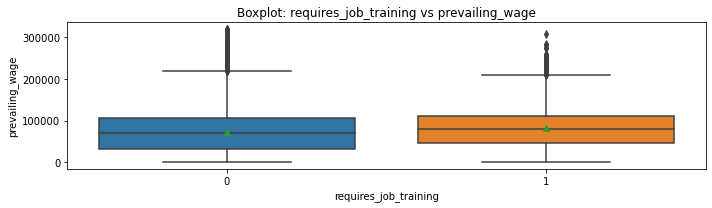

,count,mean,std,min,25%,50%,75%,max
requires_job_training,,,,,,,,
1,2955.0,82467.72027,49143.784426,3.4889,47153.805,78796.73,111691.765,307716.10
0,22525.0,73404.75216,53190.461822,2.1367,32216.540,69079.84,107029.620,319210.27


In [70]:
# Boxplot requires_job_training vs prevailing_wage
sort_index = df.groupby('requires_job_training')[['prevailing_wage']].median().sort_values(by='prevailing_wage').index
output_pretty_boxplot(df, x='requires_job_training', y='prevailing_wage', order=sort_index);
describe_df = df.groupby(['requires_job_training'])['prevailing_wage'].describe()
describe_df.sort_values(by='50%', ascending=False)

#### Observations
- The mean prevailing wage for those applicants requiring job training of 82467.72 is 12.34% higher than for those who do not require training.


- Min prevailing_wage value for 0 requires_job_training is 2.137 and max is 319210.270
- Mean prevailing_wage for 0 requires_job_training is 73404.752 which is greater than the median indicating the data is right skewed.
- prevailing_wage value for 0 requires_job_training has outliers.


- Min prevailing_wage value for 1 requires_job_training is 3.489 and max is 307716.100
- Mean prevailing_wage for 1 requires_job_training is 82467.720 which is greater than the median indicating the data is right skewed.
- prevailing_wage value for 1 requires_job_training has outliers.

#### Let's investigate region_of_employment vs prevailing_wage

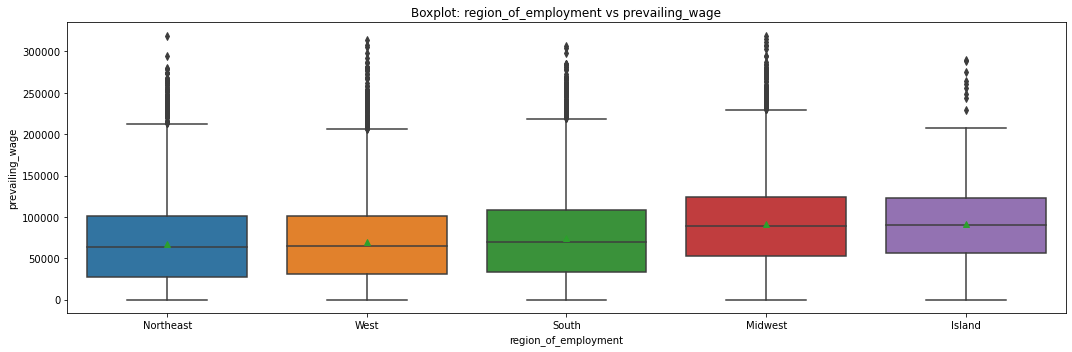

,count,mean,std,min,25%,50%,75%,max
region_of_employment,,,,,,,,
Island,375.0,91712.750760,53836.058580,52.8246,56892.265,90678.17,123159.550,289878.68
Midwest,4307.0,91696.741794,54561.011980,20.1896,52699.730,89153.91,123758.810,319210.27
South,7017.0,74040.545216,52468.450790,2.9561,34056.760,70191.52,107829.230,306206.67
West,6586.0,69832.628698,50638.413464,10.1111,30861.895,64358.44,101184.745,314156.06
Northeast,7195.0,67872.662819,51561.436157,2.1367,26859.100,63276.51,101165.480,318446.05


In [71]:
# Boxplot region_of_employment vs prevailing_wage
sort_index = df.groupby('region_of_employment')[['prevailing_wage']].median().sort_values(by='prevailing_wage').index
output_pretty_boxplot(df, x='region_of_employment', y='prevailing_wage', figsize=(15,5), \
                      order=sort_index);
describe_df = df.groupby(['region_of_employment'])['prevailing_wage'].describe()
describe_df.sort_values(by='50%', ascending=False)

#### Observations
- Island has the highest mean prevailing wage of 91712.75 while the Northeast has the lowest with 67872.66.
- Island mean prevailing wage is 35.12% higher than the Northeast mean prevailing wage. 
- A contributing factor is that the Northeast, South etc. have a high number of applicants targeting their areas for employment and can pay a lower wage whereas Island and Midwest have to pay more to attract applicants.


- Min prevailing_wage value for Island region_of_employment is 52.825 and max is 289878.680
- Mean prevailing_wage for Island region_of_employment is 91712.751 which is greater than the median indicating the data is right skewed.
- prevailing_wage value for Island region_of_employment has outliers


- Min prevailing_wage value for Midwest region_of_employment is 20.190 and max is 319210.270
- Mean prevailing_wage for Midwest region_of_employment is 91696.742 which is greater than the median indicating the data is right skewed.
- prevailing_wage value for Midwest region_of_employment has outliers.


- Min prevailing_wage value for Northeast region_of_employment is 2.137 and max is 318446.050
- Mean prevailing_wage for Northeast region_of_employment is 67872.663 which is greater than the median indicating the data is right skewed.
- prevailing_wage value for Northeast region_of_employment has outliers.


- Min prevailing_wage value for South region_of_employment is 2.956 and max is 306206.670
- Mean prevailing_wage for South region_of_employment is 74040.545 which is greater than the median indicating the data is right skewed.
- prevailing_wage value for South region_of_employment has outliers.


- Min prevailing_wage value for West region_of_employment is 10.111 and max is 314156.060
- Mean prevailing_wage for West region_of_employment is 69832.629 which is greater than the median indicating the data is right skewed.
- prevailing_wage value for West region_of_employment has outliers.

#### Let's investigate full_time_position vs prevailing_wage

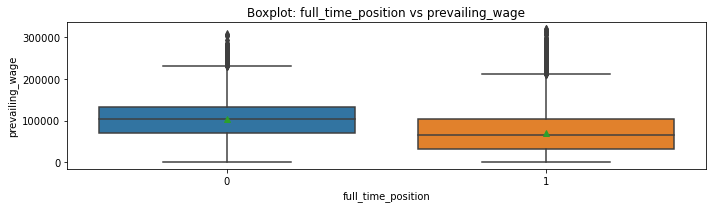

prevailing_wage                                        \
                             count           mean           std      min   
full_time_position                                                         
0                           2707.0  104745.402727  52799.529250  98.6015   
1                          22773.0   70855.326511  51651.002672   2.1367   

                                                               
                         25%        50%        75%        max  
full_time_position                                             
0                   68947.62  102446.51  133465.05  306206.67  
1                   30797.94   66392.67  103421.73  319210.27

In [72]:
# Boxplot full_time_position vs prevailing_wage
output_pretty_boxplot(df, x='full_time_position', y='prevailing_wage');
describe_df = df.groupby(['full_time_position'])[['prevailing_wage']].describe()
describe_df

#### Observations
- Min prevailing_wage value for 0 full_time_position is 98.602 and max is 306206.670
- Mean prevailing_wage for 0 full_time_position is 104745.403 which is greater than the median indicating the data is right skewed.
- prevailing_wage for 0 full_time_position has outliers.


- Min prevailing_wage value for 1 full_time_position is 2.137 and max is 319210.270
- Mean prevailing_wage for 1 full_time_position is 70855.327 which is greater than the median indicating the data is right skewed.
- prevailing_wage for 1 full_time_position has outliers.

#### Let's investigate unit_of_wage, full_time_position, prevailing_wage more deeply

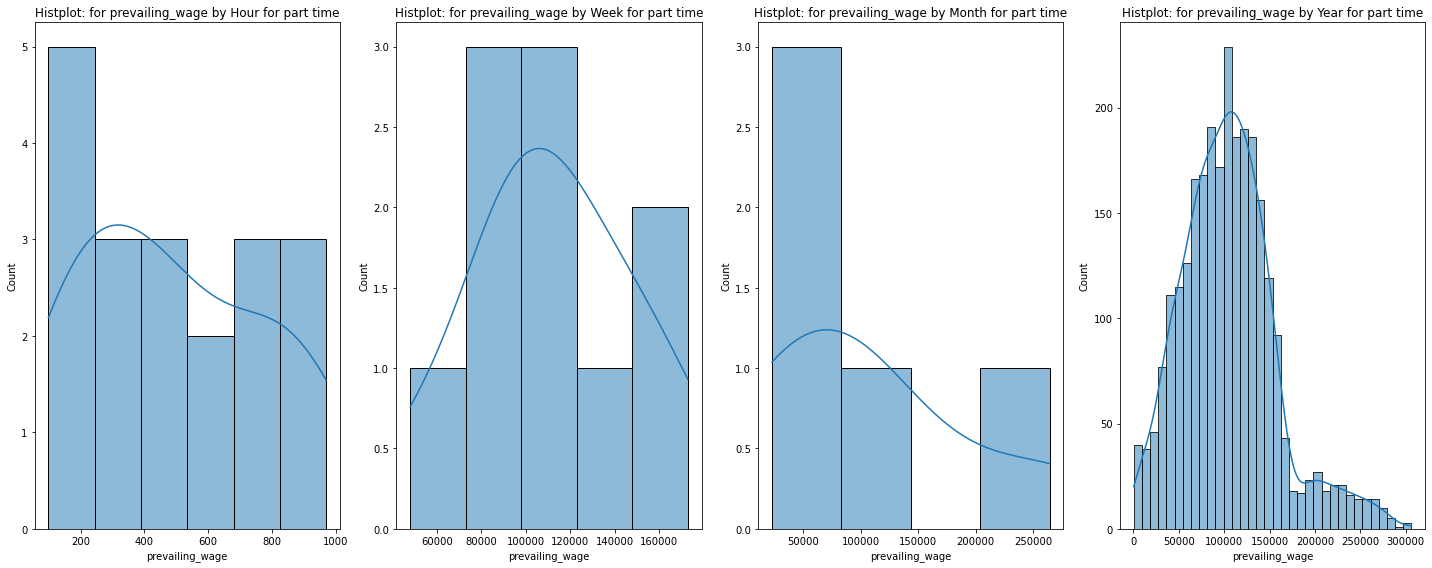

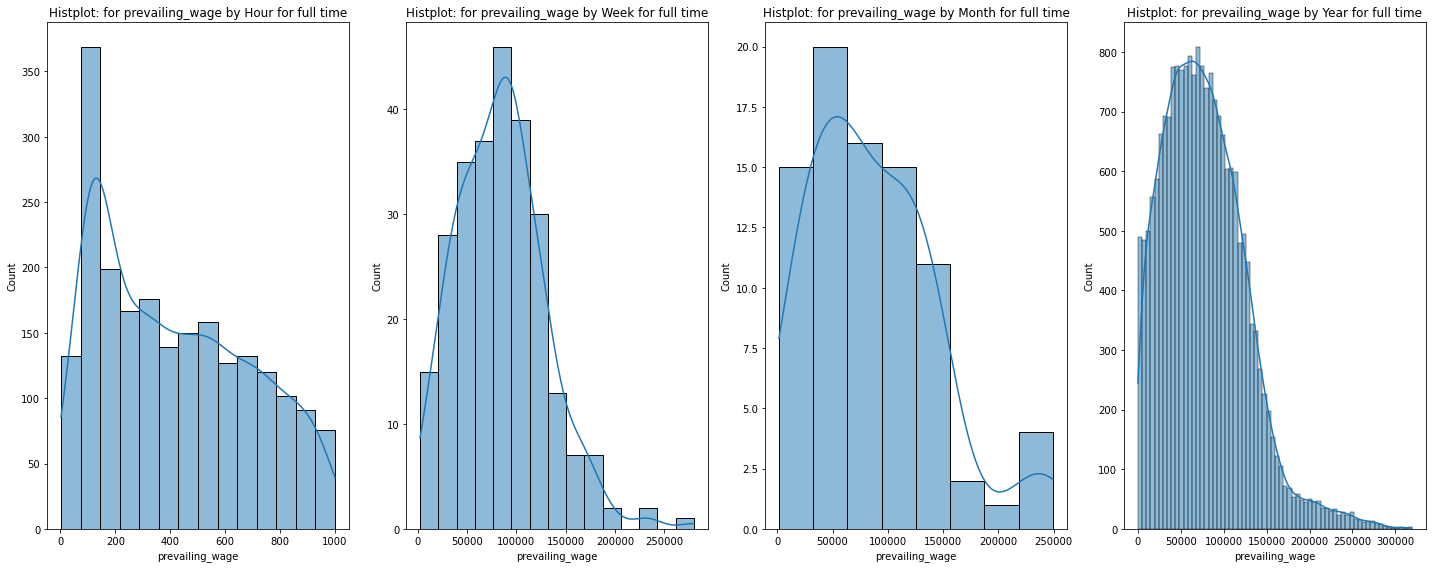

In [73]:
num_cols = ['Hour', 'Week','Month', 'Year']
feature = 'prevailing_wage'
nrows = math.ceil(len(num_cols)/4)
for full_time in [0,1]:
    plt.figure(figsize=(20,8))
    for i, variable in enumerate(num_cols):
        plt.subplot(nrows, 4, i + 1)
        full_time_title = 'full time' if full_time == 1 else 'part time'
        
        sns.histplot(data=df[(df['unit_of_wage'] == variable) & \
                             (df['full_time_position'] == full_time)],x=feature,kde=True);
        title = 'Histplot: for {} by {} for {}'.format(feature, variable, full_time_title);

        plt.title(title);
        plt.tight_layout(pad=2)

    plt.show()

#### Observations
- As mentioned earlier it is not optimal to have a non-normalized unit_of_wage. 
- Looking at the plots above the Year wages for part and full time look reasonable although I would have expected lower wages for part-time work.
- For the other units_of_wage (hour, week and month) the values seem exceedingly high and could be a keying error at play (i.e. month should have been year). 

## Data Preprocessing

### Data Preparation for Modeling

In [74]:
X = df.drop(["case_status"], axis=1)
Y = df["case_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y)
feature_names = list(x_train.columns)

In [75]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


#### Observations
- The dependent variable case_status is imbalanced in both the training and test set with ~66.7% certified and ~33.2% not certified.

## EDA

- It is a good idea to explore the data once again after manipulating it.

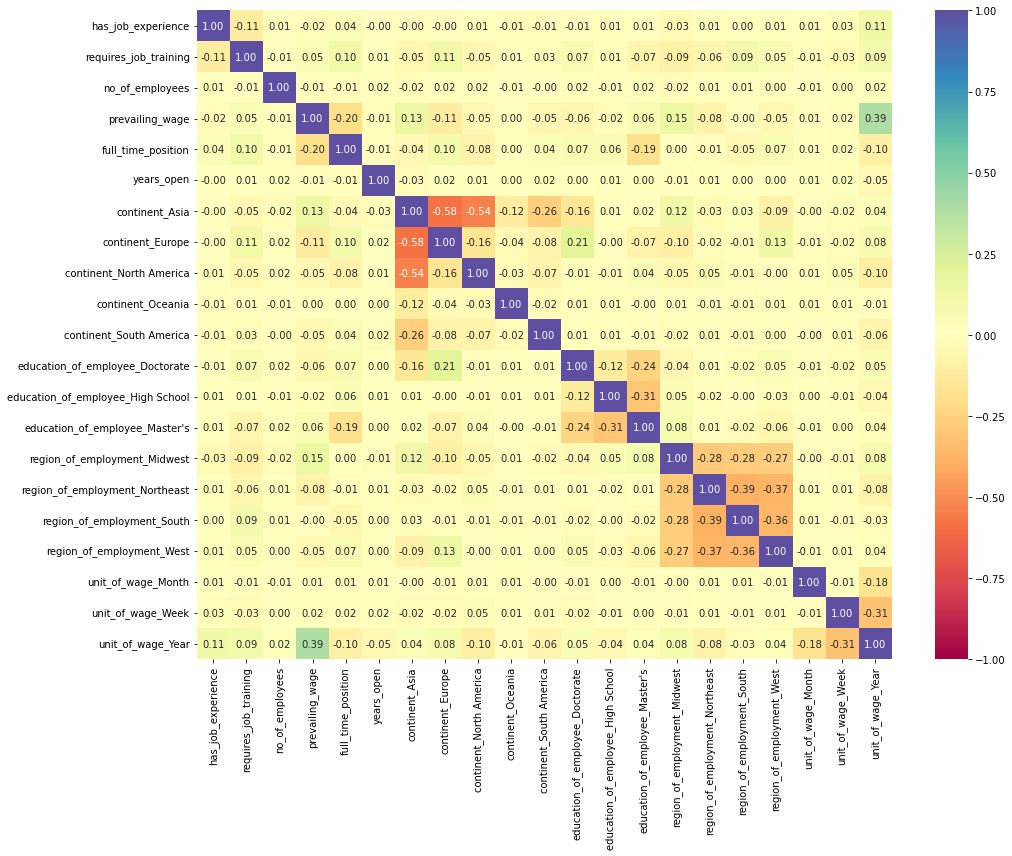

In [76]:
plt.figure(figsize=(15, 12))
sns.heatmap(
    X.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
- unit_of_wage_Year has a positive correlation of .39 with prevailing_wage.

## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

In [77]:
model_training_results = {}
model_testing_results = {}

## Decision Tree - Model Building and Hyperparameter Tuning

In [78]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

Training Performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


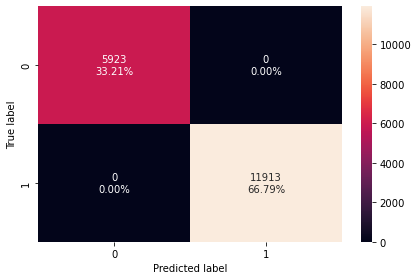

In [79]:
calculate_performance(d_tree, x_train, y_train, model_training_results, "Decision Tree")

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.658687,0.742997,0.745187,0.74409


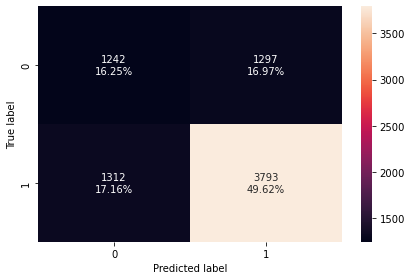

In [80]:
calculate_performance(d_tree, x_test, y_test, model_testing_results, "Decision Tree", False)

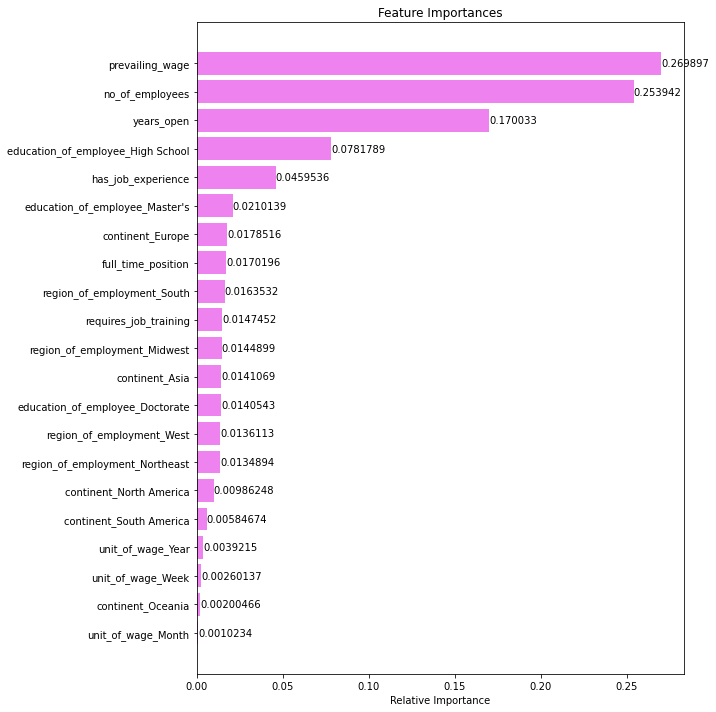

In [81]:
plot_feature_importance(d_tree, feature_names)

#### Observations
- The tree is not very generalizable and is overfitting given the f1 score of 1.0 for training and .743 for test dataset.
- We need to hypertune to see if we can further optimize f1 and make the model more generalizable.
- Most important features are prevailing_wage, no_of_employees and years_open.

### Hyperparameter Tuning

In [82]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
                'class_weight': ['balanced', None],
                'max_depth': np.arange(2,15), 
                'min_samples_leaf': [1, 2, 5, 7, 10],
                'max_leaf_nodes' : [2, 3, 5, 10,15],
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }
# Fit the best algorithm to the data. 
dtree_estimator = fit_hypertuned_model(dtree_estimator, parameters, x_train, y_train)
dtree_estimator

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, random_state=1)

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.737834,0.916226,0.747961,0.823587


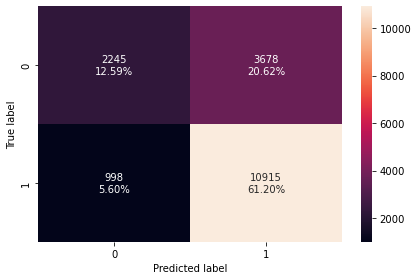

In [83]:
calculate_performance(dtree_estimator, x_train, y_train, model_training_results, "Decision Tree Estimator")

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.728938,0.914006,0.740753,0.818309


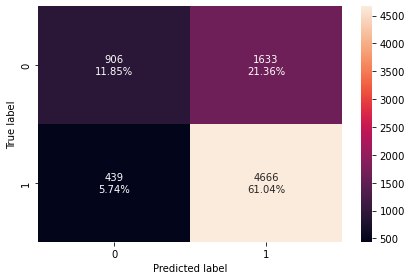

In [84]:
calculate_performance(dtree_estimator, x_test, y_test, model_testing_results, "Decision Tree Estimator", \
                      False)

#### Observations
- The hypertuned Decision Tree performed much better with a F1 test score of .818.
- The model is much more generalizable given the closeness of the training and test scores.
- Let's run some other models to see if we can improve this performance.

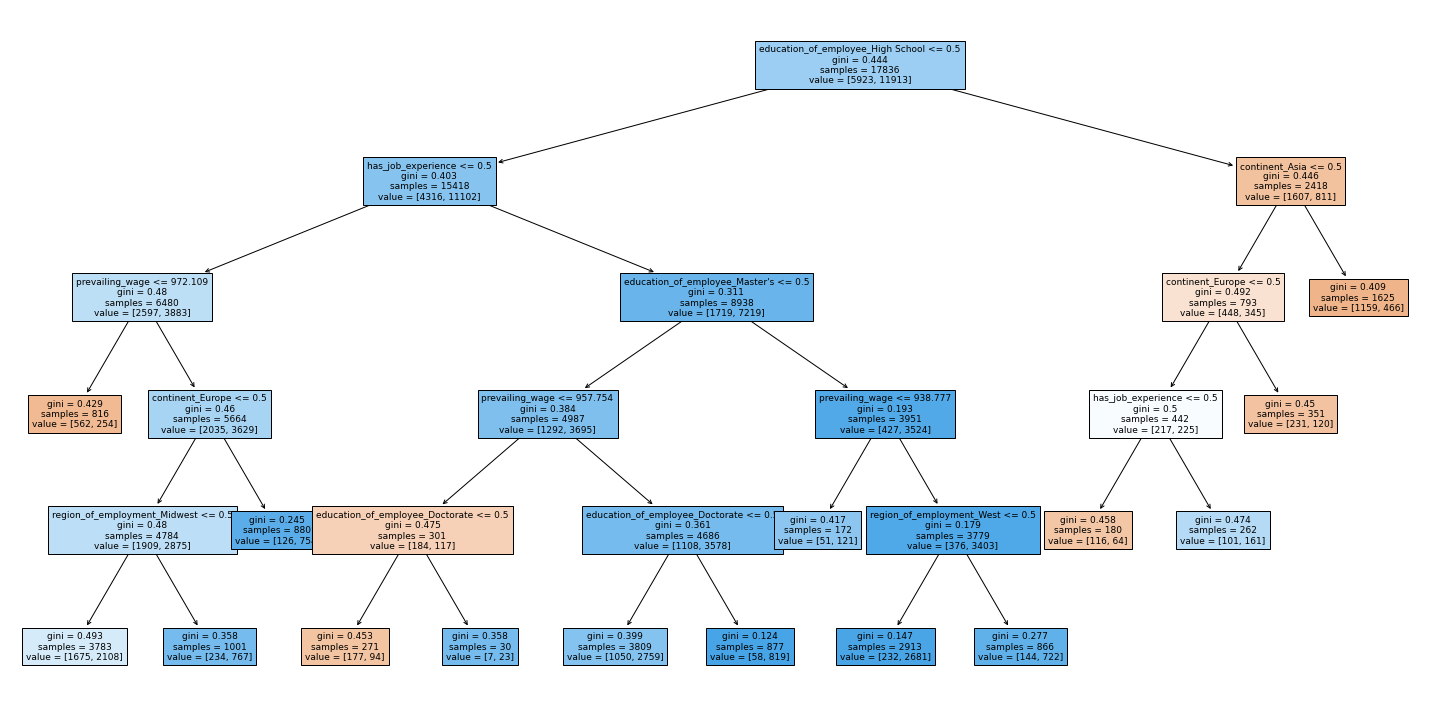

In [85]:
# Plot the decision tree
plot_tree(dtree_estimator, feature_names)

In [86]:
# Text report showing the rules of a decision tree -
print(tree.export_text(dtree_estimator, feature_names=feature_names, show_weights=True))

|--- education_of_employee_High School <= 0.50
|   |--- has_job_experience <= 0.50
|   |   |--- prevailing_wage <= 972.11
|   |   |   |--- weights: [562.00, 254.00] class: 0
|   |   |--- prevailing_wage >  972.11
|   |   |   |--- continent_Europe <= 0.50
|   |   |   |   |--- region_of_employment_Midwest <= 0.50
|   |   |   |   |   |--- weights: [1675.00, 2108.00] class: 1
|   |   |   |   |--- region_of_employment_Midwest >  0.50
|   |   |   |   |   |--- weights: [234.00, 767.00] class: 1
|   |   |   |--- continent_Europe >  0.50
|   |   |   |   |--- weights: [126.00, 754.00] class: 1
|   |--- has_job_experience >  0.50
|   |   |--- education_of_employee_Master's <= 0.50
|   |   |   |--- prevailing_wage <= 957.75
|   |   |   |   |--- education_of_employee_Doctorate <= 0.50
|   |   |   |   |   |--- weights: [177.00, 94.00] class: 0
|   |   |   |   |--- education_of_employee_Doctorate >  0.50
|   |   |   |   |   |--- weights: [7.00, 23.00] class: 1
|   |   |   |--- prevailing_wage >  957.

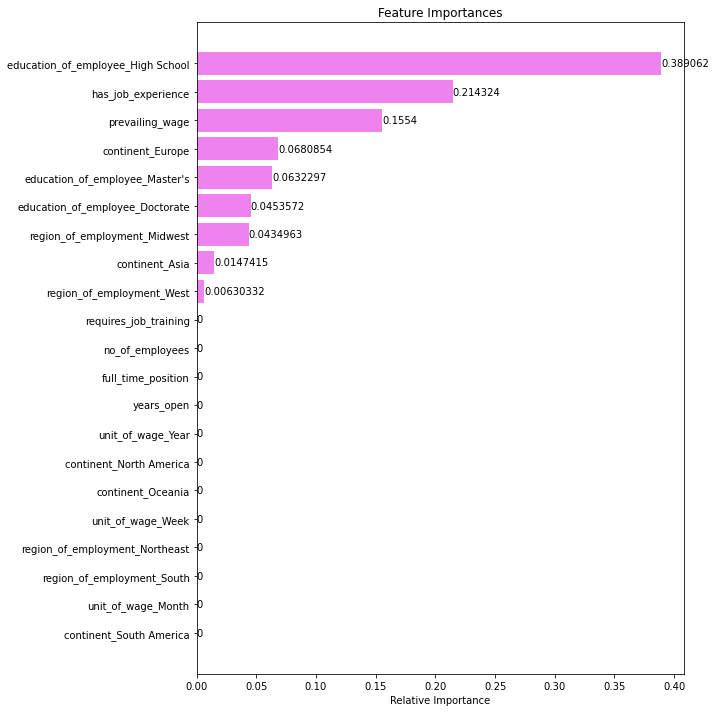

In [87]:
plot_feature_importance(dtree_estimator, feature_names)

#### Observations
- Most important features for the tuned Decision Tree are education_of_employee_High_School, has_job_experience and prevailing_wage.

## Bagging - Model Building and Hyperparameter Tuning

### Random Forest Classifier

In [88]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

Training Performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


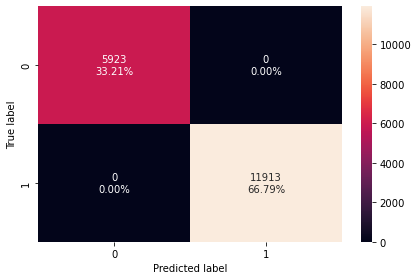

In [89]:
calculate_performance(rf_estimator, x_train, y_train, model_training_results, "Random Forest Estimator")

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.721743,0.833105,0.769356,0.799962


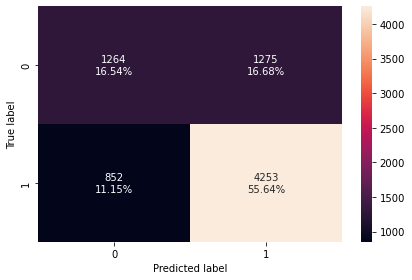

In [90]:
calculate_performance(rf_estimator, x_test, y_test, model_testing_results, "Random Forest Estimator", \
                      False)

#### Observations
- The Random Forest model did not perform as well on the test set with an F1 test score of .80.
- The model is not very generalizable given the vast difference between the training and test F1 scores.
- Let's hypertune the model to see if we can improve.

### Hyperparameter Tuning

In [91]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1,oob_score=True)

parameters = {  
                'class_weight': ['balanced', None],
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}

# Fit the best algorithm to the data. 
rf_tuned = fit_hypertuned_model(rf_tuned, parameters, x_train, y_train)
rf_tuned

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=12,
                       oob_score=True, random_state=1)

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.770632,0.903383,0.785433,0.840289


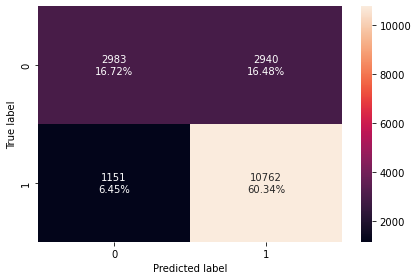

In [92]:
calculate_performance(rf_tuned, x_train, y_train, model_training_results, "Random Forest Tuned")

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.743066,0.884623,0.766593,0.82139


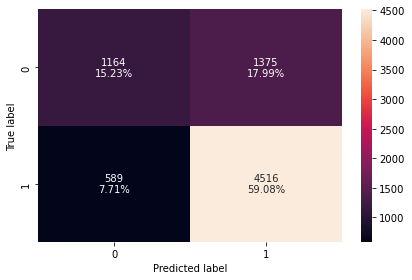

In [93]:
calculate_performance(rf_tuned, x_test, y_test, model_testing_results, "Random Forest Tuned", \
                      False)

#### Observations
- The Random Forest Tuned model perform better with a F1 test score of .82.
- The model is generalizable given the closeness between the training and test F1 scores.
- Let's try some other models to see if we can improve.

### Bagging Classifier

In [94]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(x_train,y_train)

BaggingClassifier(random_state=1)

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.985591,0.986737,0.991648,0.989187


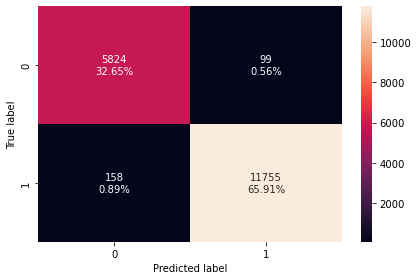

In [95]:
calculate_performance(bagging_classifier, x_train, y_train, model_training_results, "Bagging Classifier")

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.692569,0.764545,0.772718,0.76861


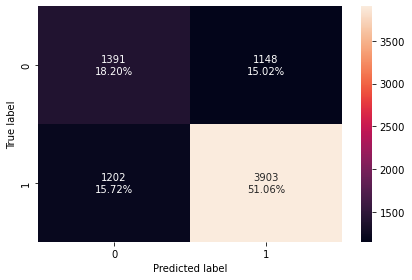

In [96]:
calculate_performance(bagging_classifier, x_test, y_test, model_testing_results, "Bagging Classifier", \
                      False)

#### Observations
- The Bagging Classifier did not perform as well on the test set as the other leading models with an F1 test score of .768.
- The model is not very generalizable given the vast difference between the training and test F1 scores.
- Let's hypertune the model to see if we can improve.

### Hyperparameter Tuning

In [97]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50,60],
             }

# Fit the best algorithm to the data. 
bagging_estimator_tuned = fit_hypertuned_model(bagging_estimator_tuned, parameters, x_train, y_train)
bagging_estimator_tuned

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=60,
                  random_state=1)

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.984862,0.999245,0.978545,0.988786


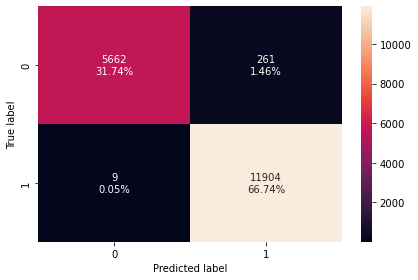

In [98]:
calculate_performance(bagging_estimator_tuned, x_train, y_train, model_training_results, "Bagging Estimator Tuned")

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.730246,0.891283,0.751197,0.815266


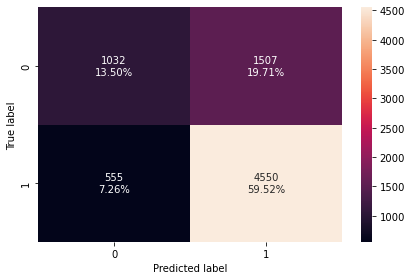

In [99]:
calculate_performance(bagging_estimator_tuned, x_test, y_test, model_testing_results, "Bagging Estimator Tuned", \
                      False)

#### Observations
- The hypertuned Bagging Classifier performed better with an F1 test score of .815.
- The model is not very generalizable given the vast difference between the training and test F1 scores.
- Let's try some other models to see if we can improve.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [100]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


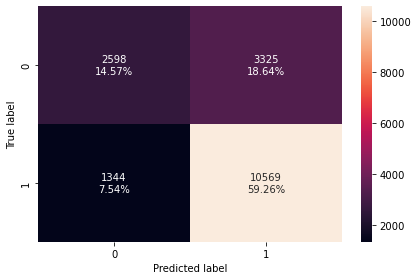

In [101]:
calculate_performance(ab_classifier, x_train, y_train, model_training_results, "AdaBoost Classifier")

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


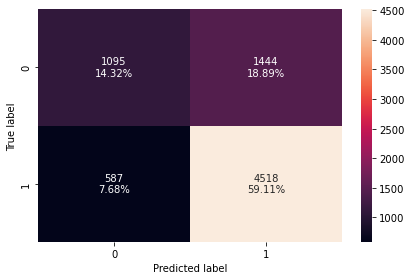

In [102]:
calculate_performance(ab_classifier, x_test, y_test, model_testing_results, "AdaBoost Classifier", \
                      False)

#### Observations
- The Ada Boost model performed better with an F1 test score of .816.
- The model is very generalizable given the closeness between the training and test F1 scores.
- Let's hypertune to see if we can improve.

### Hyperparameter Tuning

In [103]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=4)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Fit the best algorithm to the data. 
abc_tuned = fit_hypertuned_model(abc_tuned, parameters, x_train, y_train)
abc_tuned

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.30000000000000004, n_estimators=10,
                   random_state=1)

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.757849,0.891043,0.778454,0.830952


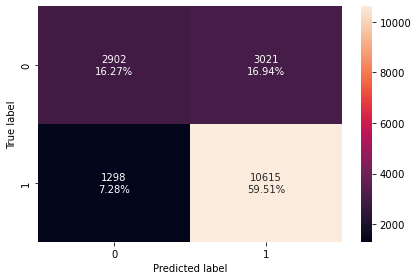

In [104]:
calculate_performance(abc_tuned, x_train, y_train, model_training_results, "AdaBoost Tuned")

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.742674,0.883643,0.766655,0.821003


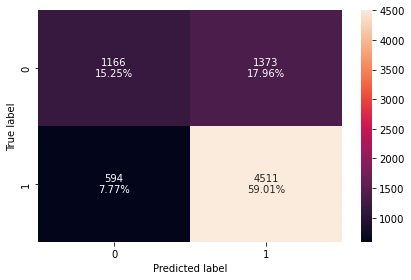

In [105]:
calculate_performance(abc_tuned, x_test, y_test, model_testing_results, "AdaBoost Tuned", False)

#### Observations
- The hypertuned Ada Boost model performed better with an F1 test score of .820.
- The model is very generalizable given the closeness between the training and test F1 scores.
- Let's try some other models to see if we can improve.

### Gradient Boosting Classifier

In [106]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.759643,0.884076,0.783748,0.830894


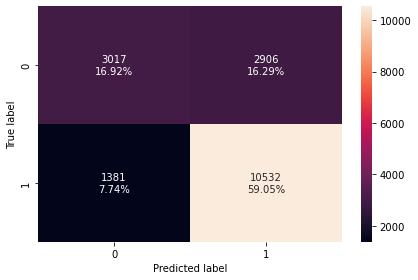

In [107]:
calculate_performance(gb_classifier, x_train, y_train, model_training_results, "Gradient Boost Classifier")

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.744898,0.876004,0.7725,0.821002


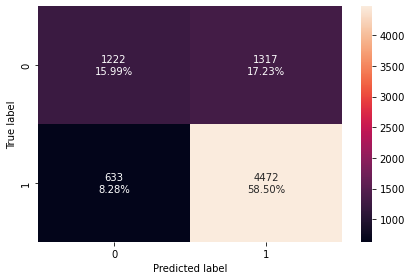

In [108]:
calculate_performance(gb_classifier, x_test, y_test, model_testing_results, "Gradient Boost Classifier", \
                      False)

#### Observations
- The Gradient Boost model performed better with an F1 test score of .821.
- The model is generalizable given the closeness between the training and test F1 scores.
- Let's hypertune to see if we can improve.

### Hyperparameter Tuning

In [109]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Fit the best algorithm to the data. 
gbc_tuned = fit_hypertuned_model(gbc_tuned, parameters, x_train, y_train)
gbc_tuned

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=1)

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.757961,0.882397,0.782842,0.829644


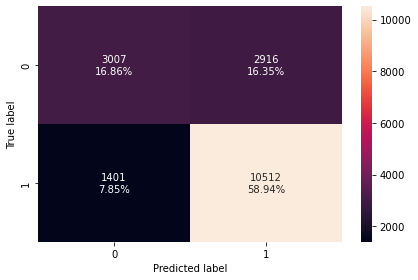

In [110]:
calculate_performance(gbc_tuned, x_train, y_train, model_training_results, "Gradient Boost Tuned")

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.744505,0.874633,0.772759,0.820546


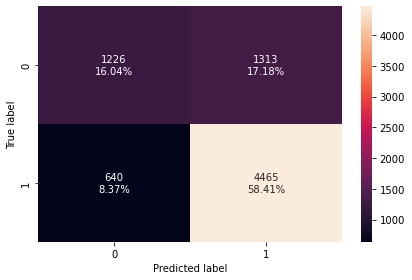

In [111]:
calculate_performance(gbc_tuned, x_test, y_test, model_testing_results, "Gradient Boost Tuned", \
                      False)

#### Observations
- The hypertuned Gradient Boost model performed about the same with an F1 test score of .820.
- The model is generalizable given the closeness between the training and test F1 scores.
- Let's try some other models to see if we can improve.

### XGBoost Classifier

In [112]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.840323,0.933014,0.844284,0.886434


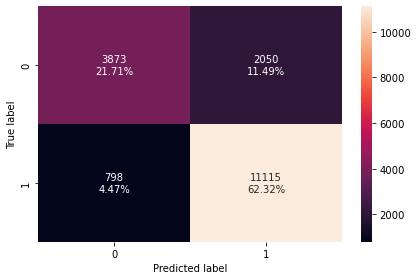

In [113]:
calculate_performance(xgb_classifier, x_train, y_train, model_training_results, "XGBoost Classifier")

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.730246,0.857003,0.766602,0.809286


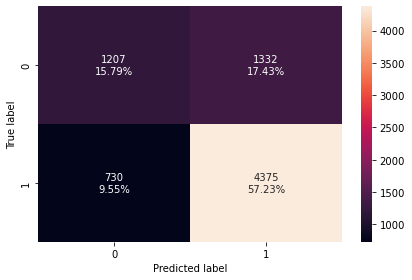

In [114]:
calculate_performance(xgb_classifier, x_test, y_test, model_testing_results, "XGBoost Classifier", \
                      False)

#### Observations
- The XG Boost model did not perform as well with a F1 test score of .809.
- The model is fairly generalizable given the closeness between the training and test F1 scores.
- Let's hypertune see if we can improve.

### Hyperparameter Tuning

In [115]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Fit the best algorithm to the data. 
xgb_tuned = fit_hypertuned_model(xgb_tuned, parameters, x_train, y_train)
xgb_tuned

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.762335,0.902627,0.7774,0.835347


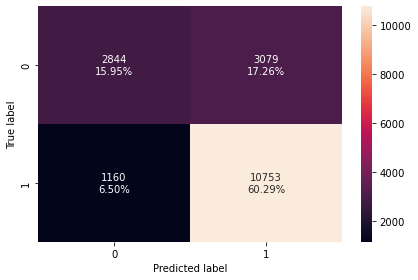

In [116]:
calculate_performance(xgb_tuned, x_train, y_train, model_training_results, "XGBoost Tuned")

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.742543,0.889912,0.763658,0.821965


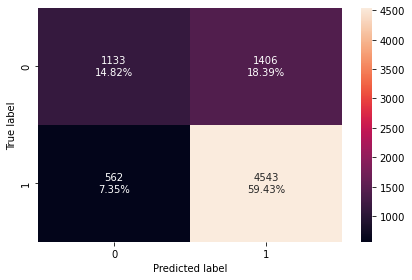

In [117]:
calculate_performance(xgb_tuned, x_test, y_test, model_testing_results, "XGBoost Tuned", \
                      False)

#### Observations
- The hypertuned XG Boost model performed better with an F1 test score of .821.
- The model is generalizable given the closeness between the training and test F1 scores.
- Let's try some other models to see if we can improve.

## Stacking Model

In [118]:
estimators = [('Ada Boost Tuned',abc_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]
final_estimator = xgb_tuned
stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)
stacking_classifier.fit(x_train,y_train)

StackingClassifier(estimators=[('Ada Boost Tuned',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                                                   learning_rate=0.30000000000000004,
                                                   n_estimators=10,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree',
                                DecisionTreeClas...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_typ

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.756392,0.886594,0.779138,0.8294


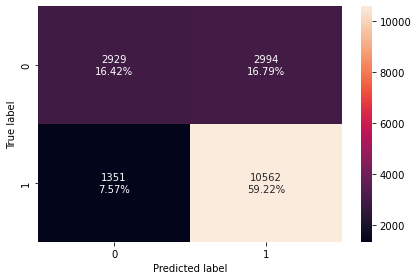

In [119]:
calculate_performance(stacking_classifier, x_train, y_train, model_training_results, "Stacking Classifier")

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.74516,0.880118,0.770801,0.82184


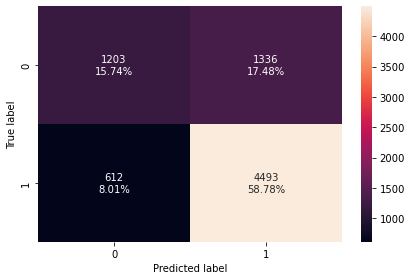

In [120]:
calculate_performance(stacking_classifier, x_test, y_test, model_testing_results, "Stacking Classifier", \
                      False)

#### Observations
- The Stacking model performed about the same an F1 test score of .821.
- The model is generalizable given the closeness between the training and test F1 scores.

## Comparing all models

In [121]:
models_train_comp_df = pd.concat(model_training_results.values(), axis=1)
models_train_comp_df.columns = list(model_training_results.keys())
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,AdaBoost Classifier,AdaBoost Tuned,Gradient Boost Classifier,Gradient Boost Tuned,XGBoost Classifier,XGBoost Tuned,Stacking Classifier
Accuracy,1.0,0.737834,1.0,0.770632,0.985591,0.984862,0.738226,0.757849,0.759643,0.757961,0.840323,0.762335,0.756392
Recall,1.0,0.916226,1.0,0.903383,0.986737,0.999245,0.887182,0.891043,0.884076,0.882397,0.933014,0.902627,0.886594
Precision,1.0,0.747961,1.0,0.785433,0.991648,0.978545,0.760688,0.778454,0.783748,0.782842,0.844284,0.777400,0.779138
F1,1.0,0.823587,1.0,0.840289,0.989187,0.988786,0.819080,0.830952,0.830894,0.829644,0.886434,0.835347,0.829400


In [122]:
models_test_comp_df = pd.concat(model_testing_results.values(), axis=1)
models_test_comp_df.columns = list(model_testing_results.keys())
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,AdaBoost Classifier,AdaBoost Tuned,Gradient Boost Classifier,Gradient Boost Tuned,XGBoost Classifier,XGBoost Tuned,Stacking Classifier
Accuracy,0.658687,0.728938,0.721743,0.743066,0.692569,0.730246,0.734301,0.742674,0.744898,0.744505,0.730246,0.742543,0.745160
Recall,0.742997,0.914006,0.833105,0.884623,0.764545,0.891283,0.885015,0.883643,0.876004,0.874633,0.857003,0.889912,0.880118
Precision,0.745187,0.740753,0.769356,0.766593,0.772718,0.751197,0.757799,0.766655,0.772500,0.772759,0.766602,0.763658,0.770801
F1,0.744090,0.818309,0.799962,0.821390,0.768610,0.815266,0.816481,0.821003,0.821002,0.820546,0.809286,0.821965,0.821840


#### Observations
- The top three models based on test F1 score were XGBoost Tuned, Stacking Classifier and Random Forest Tuned.

In [123]:
perf_comparison_df = pd.DataFrame()
keys = model_training_results.keys()
perf_comparison_df['Method'] = keys
diff_values = []
test_values = []
for key in keys:
    diff_values.append(percent_diff(models_train_comp_df[key]['F1'], models_test_comp_df[key]['F1']))
    test_values.append(models_test_comp_df[key]['F1']*100)

perf_comparison_df['Diff between Train and Test'] = diff_values
perf_comparison_df['Test'] = test_values
perf_comparison_df.sort_values(by=['Test','Diff between Train and Test'], ascending=[False, False])

,Method,Diff between Train and Test,Test
11,XGBoost Tuned,-1.556886,82.196490
12,Stacking Classifier,-0.844391,82.184013
3,Random Forest Tuned,-2.261905,82.138960
7,AdaBoost Tuned,-1.203369,82.100282
8,Gradient Boost Classifier,-1.203369,82.100239
9,Gradient Boost Tuned,-1.084337,82.054581
1,Decision Tree Estimator,-0.728155,81.830937
6,AdaBoost Classifier,-0.366300,81.648143
5,Bagging Estimator Tuned,-17.593529,81.526608
10,XGBoost Classifier,-8.690745,80.928598


### Important features of the final model

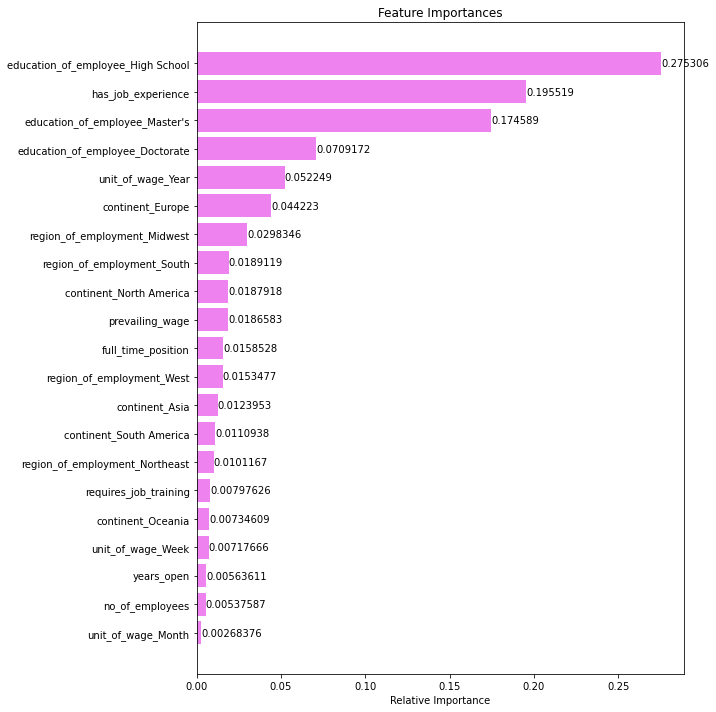

In [124]:
plot_feature_importance(stacking_classifier.final_estimator, feature_names)

#### Observations
- The top three most important features of the Stacking Classifier model are education_of_employee_High_School, has_job_experience and education_employee_Master's.

## Model Performance Comparison and Conclusions

- The top three models based on test F1 score were XGBoost Tuned, Stacking Classifier and Random Forest Tuned.
- Of the top three Stacking Classifier had the smallest difference in performance between the test and training datasets (-0.844391).
- Based on the high test F1 score and the very high level of generalizability I choose Stacking Classifier for the best performing model.
- Note that the other two models in the to three are also worth candidates to solve this problem.

## Actionable Insights and Recommendations
* Although I picked the Stacking Classifier models any of the top three or four models are worthy candidates and can provide a generalizable solution.
* The top three most important features for the Stacking Classifier are education_of_employee_High_School, has_job_experience and education_employee_Master's. Of note with these particular features:
> * The South has the highest percentage of High School applicants with 27.3% while the Island has the lowest with 1.7%.
> * Africa has the highest percentage of applicants with job experience with 60.6% while Oceania has the least with 53.6%.
> * The visa certification rate for applicants with job experience is 32.69% higher than those without thus has_job_experience influences visa certification.
> * The Northeast has the highest percentage of Master's applicants with 28.6% while the Island has the lowest with 1.6%.
> * Asia has the majority of applicants with High School education with 66.9% while Oceania has the least with 1%.
> * Asia has the majority of applicants with Master's with 67% while Oceania has the least with .7%
> * Asia has the majority of applicants with High School education with 66.9% while Oceania has the least with 1%.


* This Stacking Classifier model is a high performing and generalizable model can be used to rapidly cull out those applicants that are unlikely to be certified. With this approach efforts can be targeted towards the applicants that are likely to be certified.

### Data Insights
* Asia has the most applicants with 66.17% while Oceania has the fewest applicants with .7%.
* 66.7% of the applicants are certified while 33.2% are not indicating that the dependent variable is imbalanced.
* The most likely unit_of_wage for applicants to be certified is Year with 69.8% were certified while the least likely is Hour with 34.6% certification.
* The mean prevailing_wage for applicants that were certified is 77293.61 which is is 12.43% higher than the mean prevailing wage for those that were not certified.
* For applicants with job experience 74.4% of them were certified for their visa while only 56% of those who did not have job experience were certified.
* European applicants had the highest certification rate 79.2% while those from South America had the lowest 57.8%.
* Applicants in the Midwest region had the highest visa certification rate with 75.5% versus Island which had the lowest with 60.2%.
* The visa certification rate for applicants with job experience is 32.69% higher than those without thus has_job_experience influences visa certification.
* Those with a Doctorate had the highest Visa certification rate of 87.2% while those with only High School had a 34% certification rate.
> * As the level of education increases so does the probability of certification. 

* Those with Master's level education has the highest mean prevailing wage of 78843.05 while those with a Doctorate had the lowest with 64561.07.
> * This indicates in terms of prevailing wage that education is important however past a certain point it has a negative effect on prevailing wage (i.e. lots of education but not enough 'real world' experience). 


* The most popular region of employment is the Northeast which has 28.2% while Island is the least popular region with 1.4%.

* The most popular unit of wage is Year with 90.1% and Monthly is the least popular with .3%.

* 89.3% of the applicants have Full time work while 10.6% do not.

* Applicants that have Bachelor's are the leading education type with 40.1% while those with a Doctorate are the fewest with 8.6%.
* The South has the highest percentage of Bachelor applicants with 29.2% while the Island has the lowest with 1.2%.
* The West has the highest percentage of Doctorate applicants with 32.5% while the Island has the lowest with 1.1%.
* The South has the highest percentage of High School applicants with 27.3% while the Island has the lowest with 1.7%.
* The Northeast has the highest percentage of Master's applicants with 28.6% while the Island has the lowest with 1.6%.

#### Further analysis that can be done:
* Suggest converting prevailing wage to a single unit of wage for consistency and rerun the analysis. 
* Review the prevailing_wage/unit_of_wage features to ensure there are no mis-keys based on what seem to be very high values for hour/week/month.
* Capture background check results of applicants and perform a follow up analysis.
* Capture OES/SOC Codes for applicants and rerun analysis to potentially reveal more about their occupation and its relationship with visa certification.